## CMPINF 2100 Week 08

### Motivate - the example data for working with MANY variables

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Penguins

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


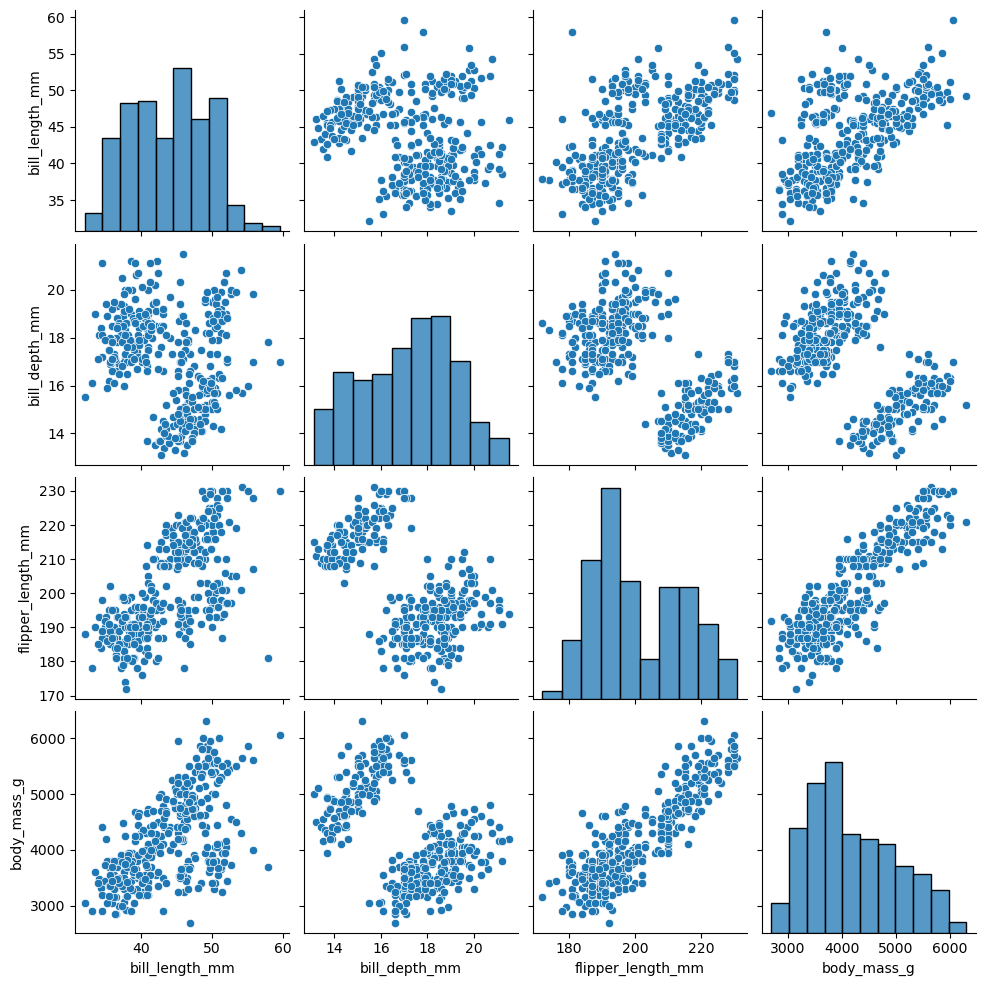

In [4]:
sns.pairplot(data = penguins)

plt.show()

## Diamonds

In [5]:
diamonds = sns.load_dataset('diamonds')

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


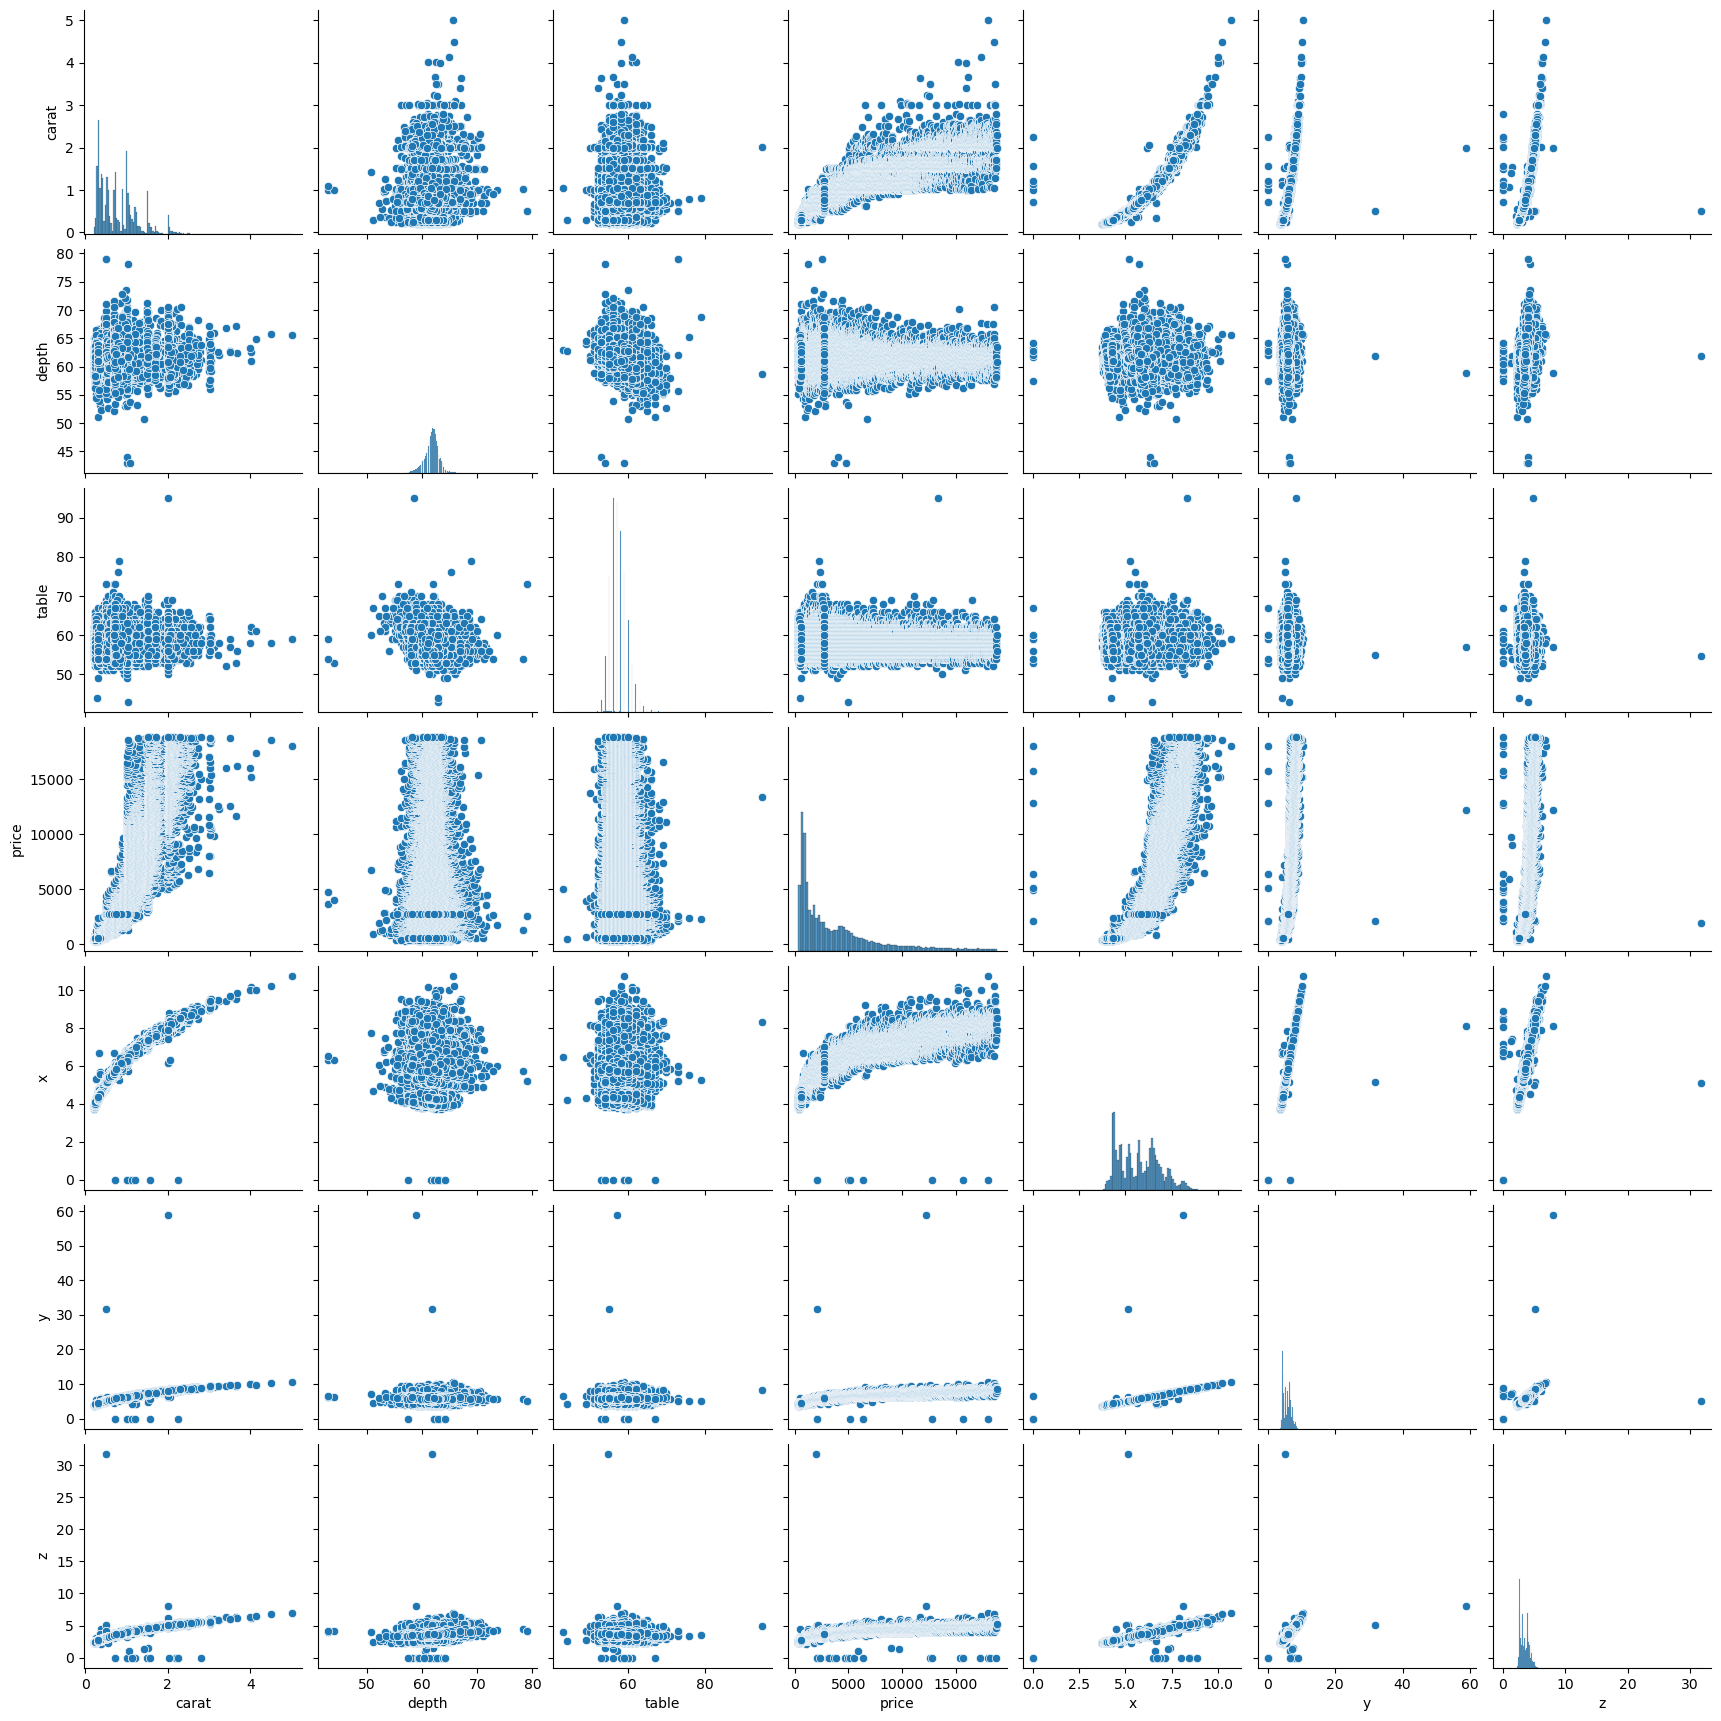

In [7]:
sns.pairplot(data = diamonds)

plt.show()

## Wine data

In [8]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [9]:
wine_names = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanin', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

In [10]:
wine_data = pd.read_csv( wine_url, names=wine_names )

In [11]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivar              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanin        178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


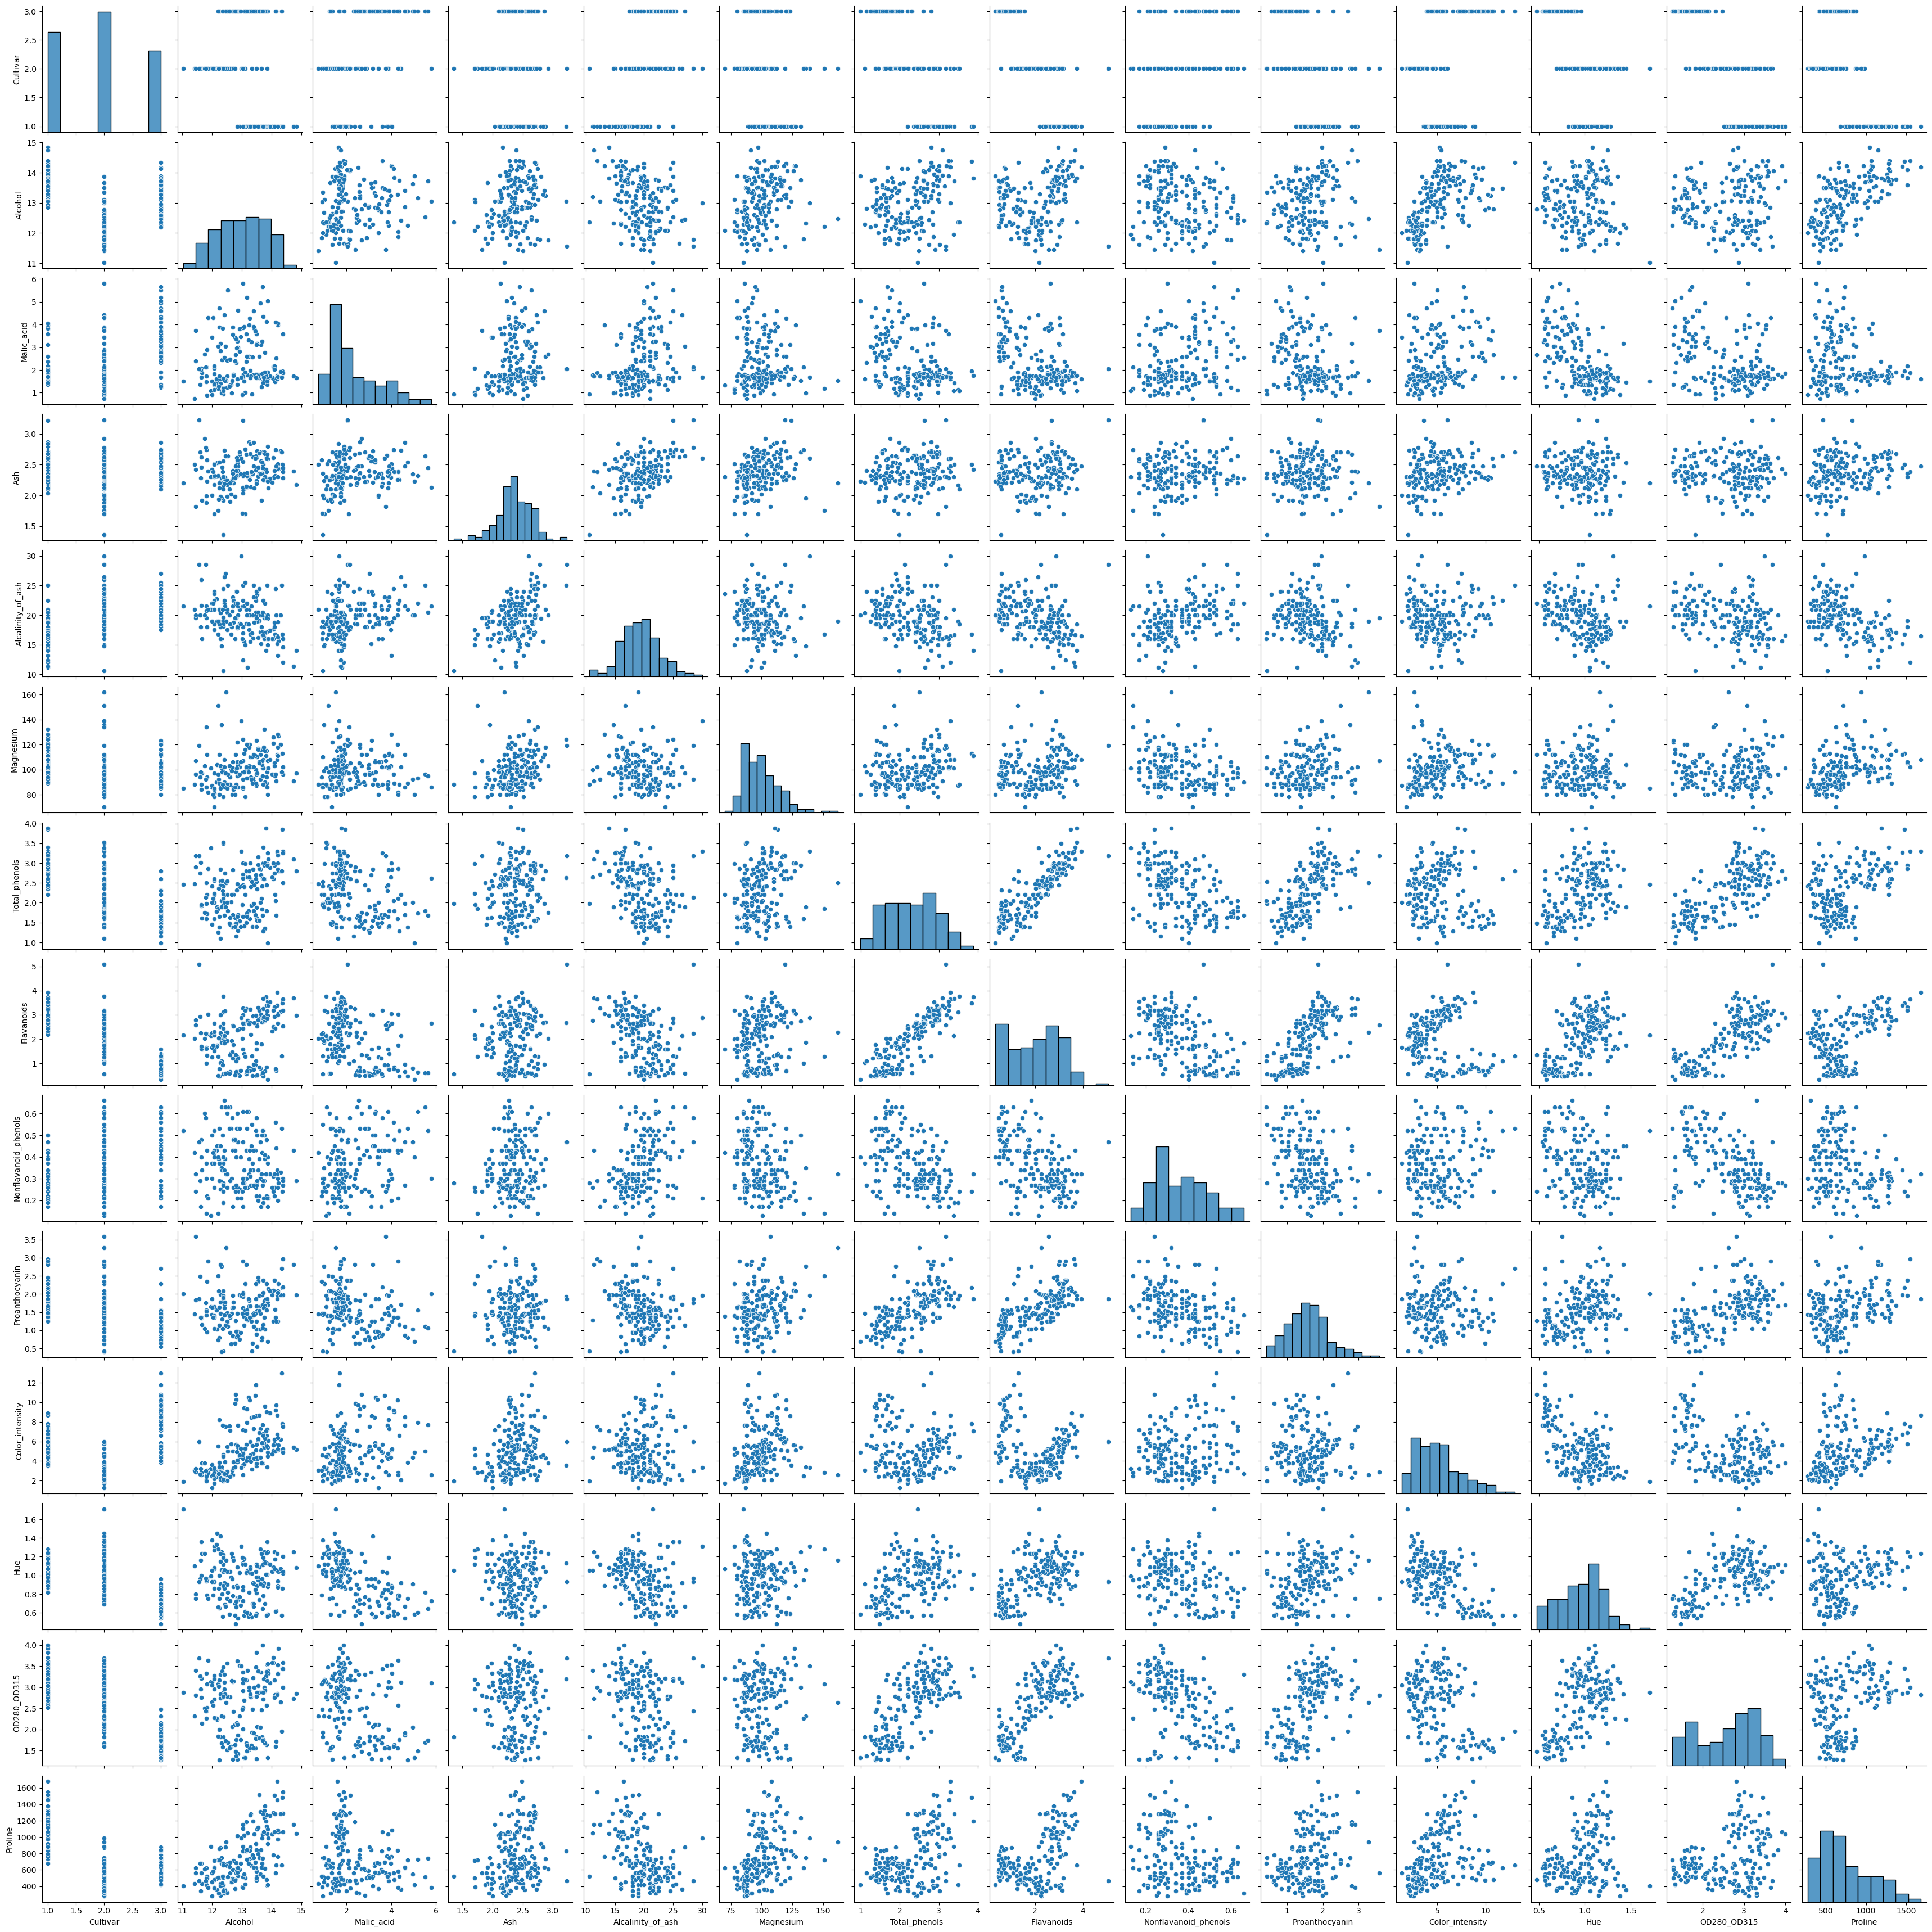

In [12]:
sns.pairplot(data = wine_data)

plt.show()

## Sonar data

In [13]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [14]:
sonar_df = pd.read_csv( sonar_url, header=None )

In [15]:
sonar_df.shape

(208, 61)

In [16]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

## IMPORTANT: Do NOT forget about RESHAPING!!!!

Reshaping WIDE to LONG FORMAT will help you explore MANY COLUMNS!!!!!!

### Diamonds

Let's reshape the `diamonds` dataframe from WIDE to LONG FORMAT. We will GATHER or STACK all numeric columns ON TOP OF each other!!!! The non-numeric columns will NOT be gathered or stacked up!

In [17]:
diamonds_numeric_names = diamonds.select_dtypes('number').columns.tolist()

In [18]:
diamonds_numeric_names

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [19]:
diamonds_category_names = diamonds.select_dtypes('category').columns.tolist()

In [20]:
diamonds_category_names

['cut', 'color', 'clarity']

Reshape from WIDE TO LONG!

In [24]:
diamonds_lf = diamonds.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid']+diamonds_category_names,
     value_vars=diamonds_numeric_names)

In [25]:
diamonds_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377580 entries, 0 to 377579
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   rowid     377580 non-null  int64   
 1   cut       377580 non-null  category
 2   color     377580 non-null  category
 3   clarity   377580 non-null  category
 4   variable  377580 non-null  object  
 5   value     377580 non-null  float64 
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 9.7+ MB


In [26]:
diamonds_lf.variable.value_counts()

carat    53940
depth    53940
table    53940
price    53940
x        53940
y        53940
z        53940
Name: variable, dtype: int64

We can now associated the `variable` column within the LONG FORMAT data with the `col` argument to create COLUMN FACETS!!!

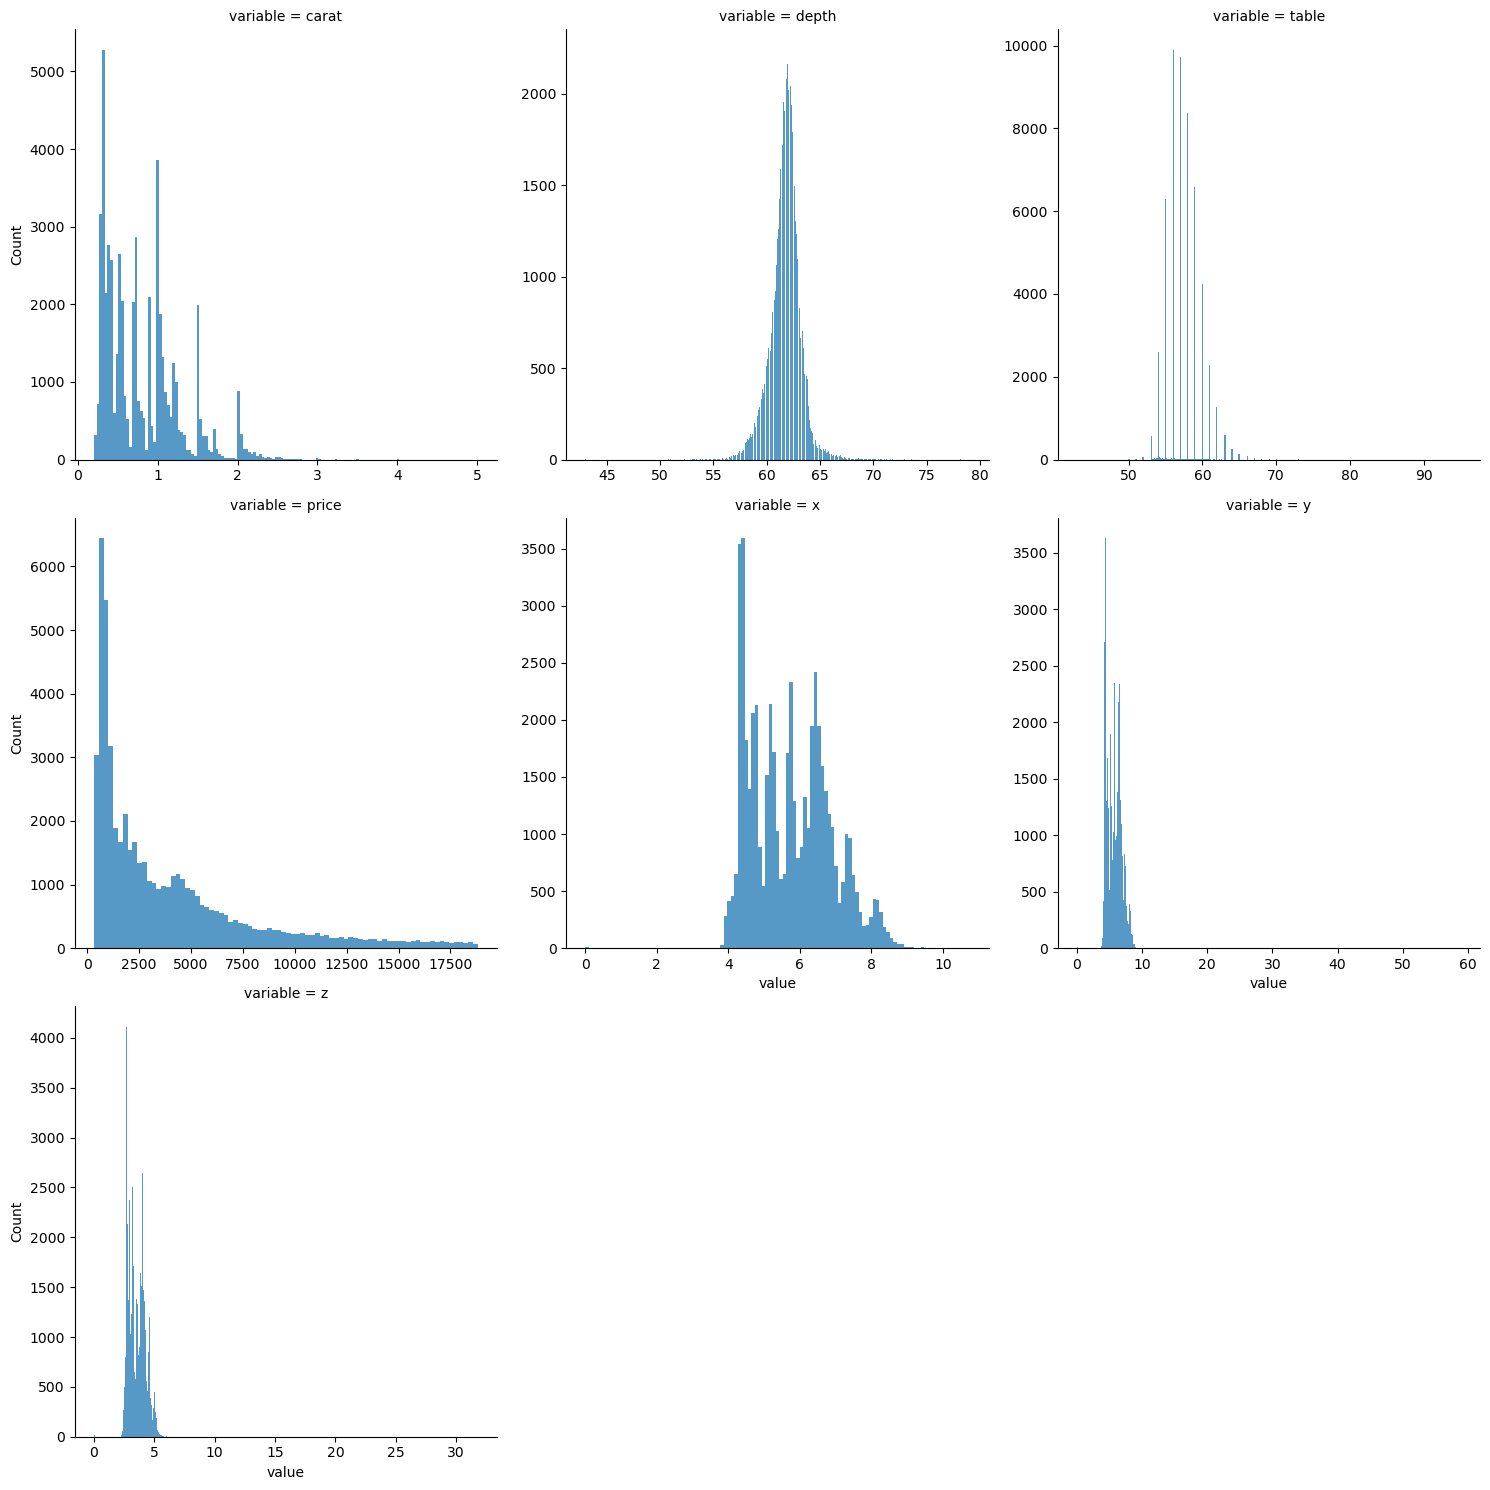

In [27]:
sns.displot(data = diamonds_lf, x='value', col='variable', col_wrap=3,
            kind='hist',
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

We can also study the CONDITIONAL DISTRIBUTION of the numeric columns GIVEN or GROUPBED BY a categorical variable!

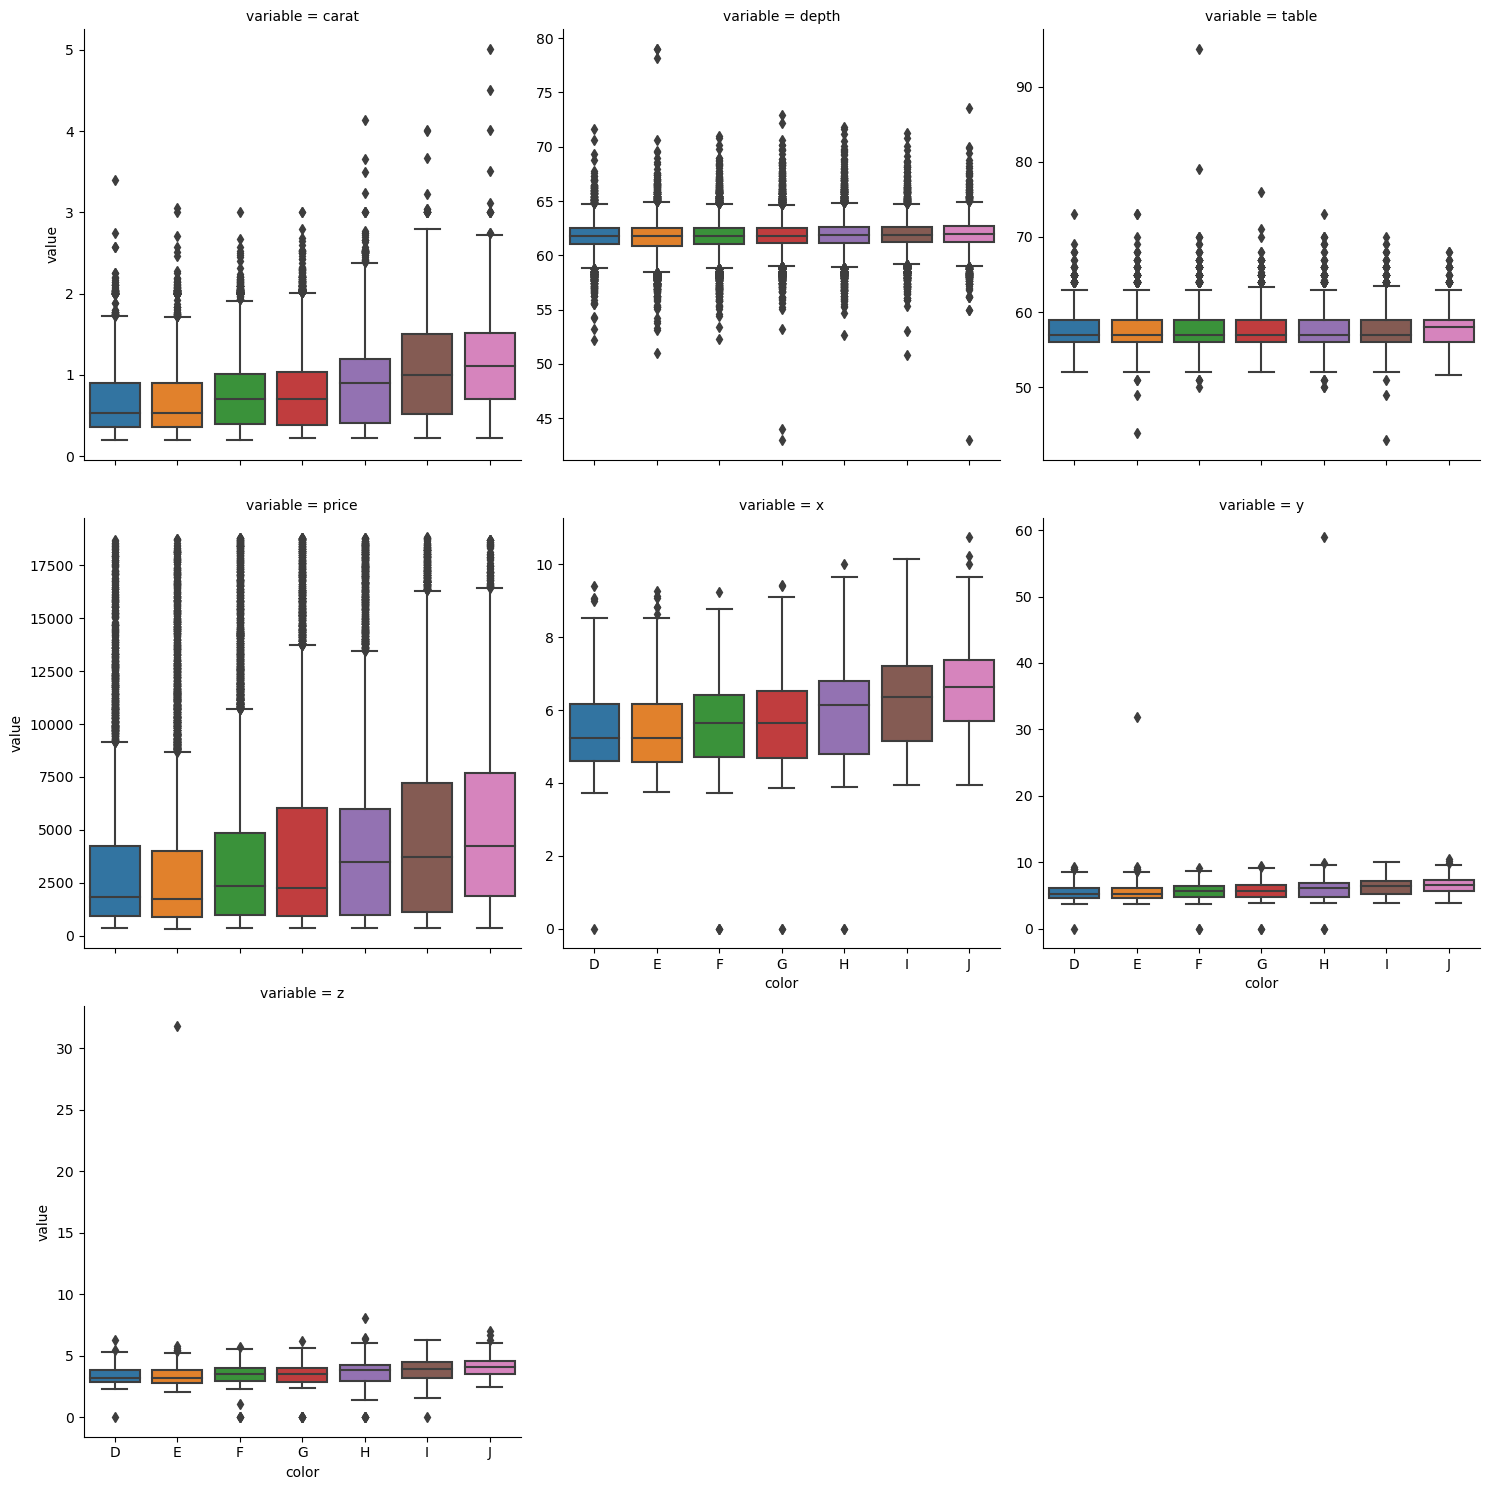

In [28]:
sns.catplot(data = diamonds_lf, x='color', y='value', col='variable', col_wrap=3,
            kind='box', sharey=False)

plt.show()

Study the CONDITIONAL MEAN or the AVERAGE per GROUP!

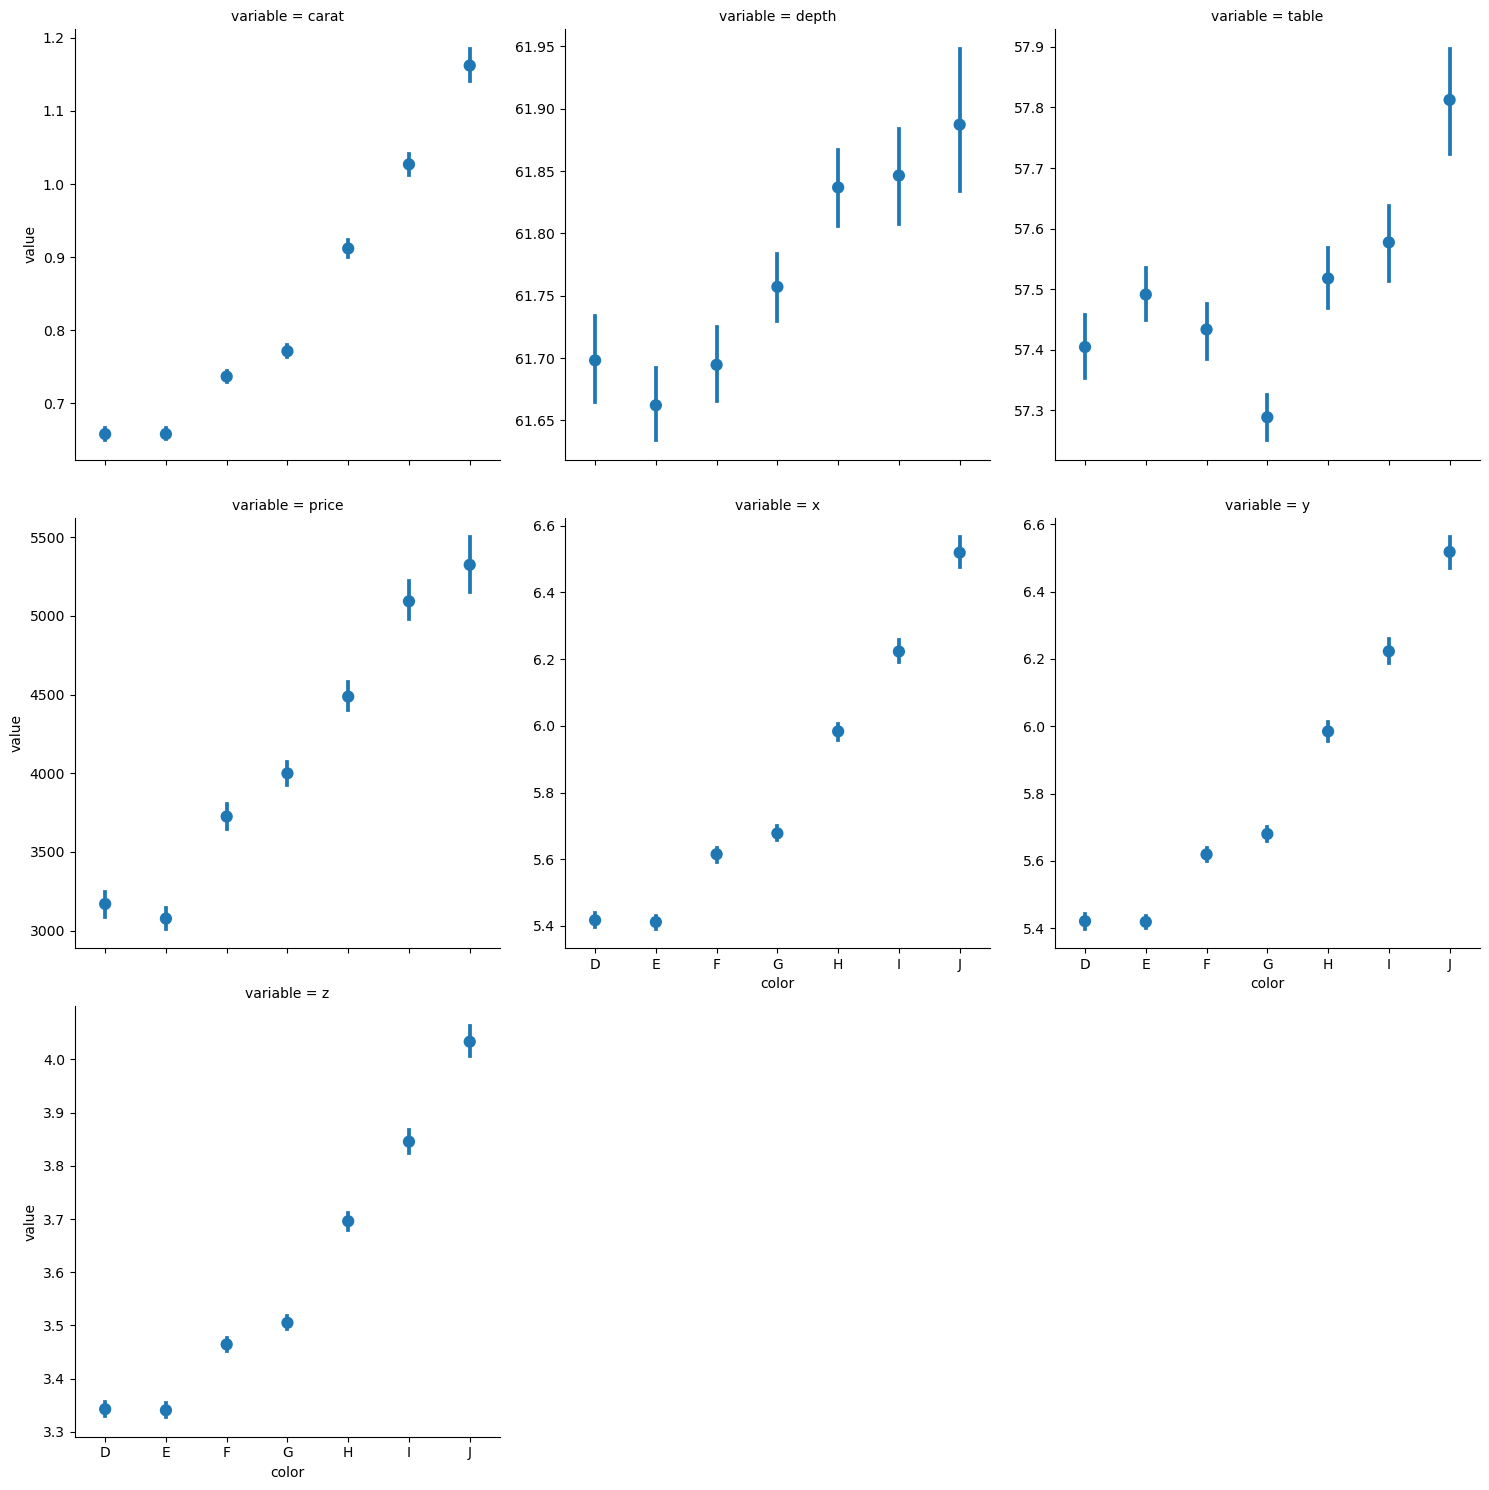

In [29]:
sns.catplot(data = diamonds_lf, x='color', y='value', col='variable', col_wrap=3,
            kind='point', join=False,
            sharey=False)

plt.show()

You always need to examine the SHAPE of the distribution!!!

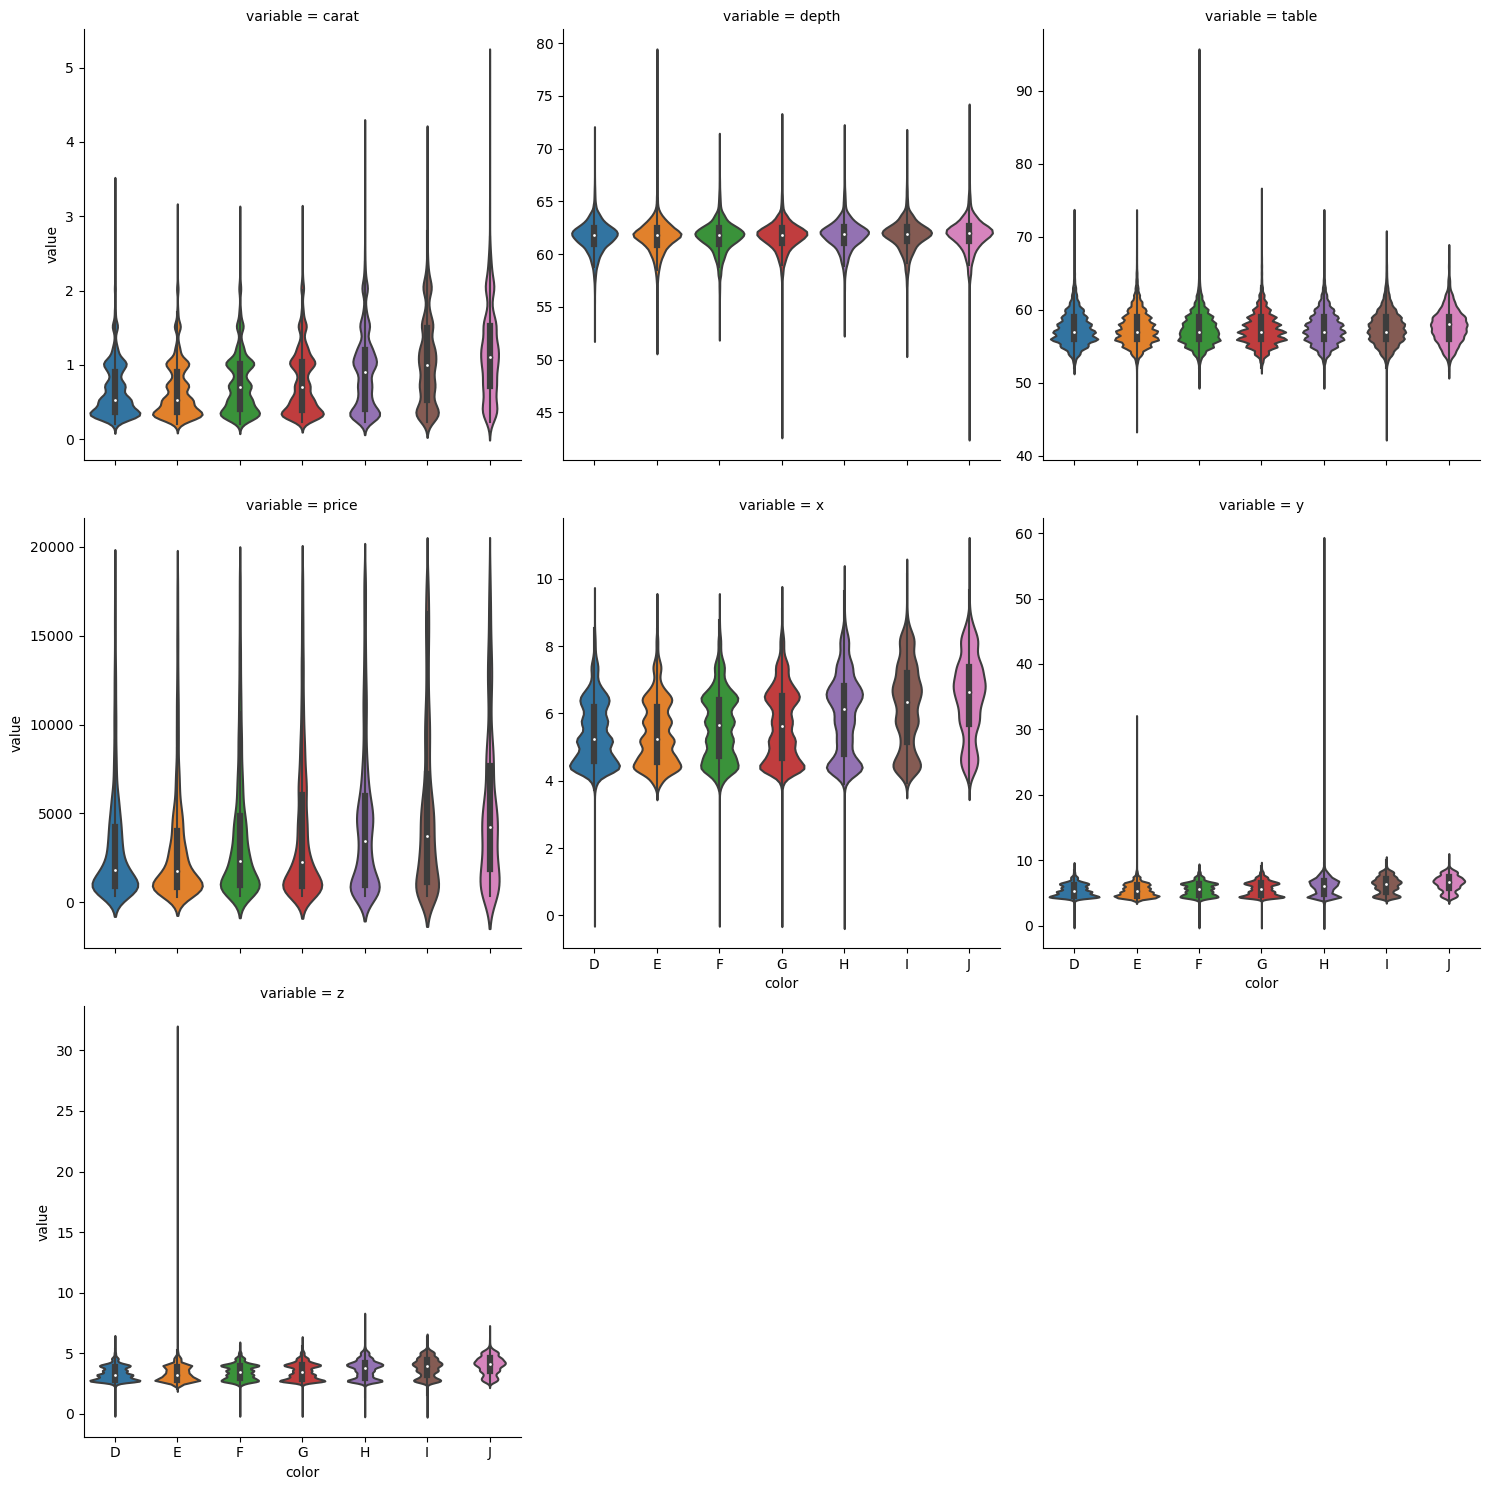

In [30]:
sns.catplot(data = diamonds_lf, x='color', y='value', col='variable', col_wrap=3,
            kind='violin', sharey=False)

plt.show()

### Sonar

In [31]:
sonar_df.shape

(208, 61)

In [32]:
sonar_df.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [33]:
sonar_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

I do NOT like to use NUMBERS as column names!!!

So let's change them using a LIST COMPREHENSION!!!!

Let's change the column names to the pattern `'X00'` then `'X01'`, then `'X02'`...

In [34]:
'X%02d' % 0

'X00'

In [36]:
'X%02d' % 1

'X01'

In [37]:
'X%02d' % 10

'X10'

In [38]:
'X%02d' % 33

'X33'

In [40]:
sonar_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [39]:
['X%02d' % d for d in sonar_df.columns]

['X00',
 'X01',
 'X02',
 'X03',
 'X04',
 'X05',
 'X06',
 'X07',
 'X08',
 'X09',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60']

In [41]:
sonar_df.columns = ['X%02d' % d for d in sonar_df.columns]

In [42]:
sonar_df.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60'],
      dtype='object')

In [43]:
sonar_df['X00']

0      0.0200
1      0.0453
2      0.0262
3      0.0100
4      0.0762
        ...  
203    0.0187
204    0.0323
205    0.0522
206    0.0303
207    0.0260
Name: X00, Length: 208, dtype: float64

We need to extract the NUMERIC column names.

In [44]:
sonar_numeric_names = sonar_df.select_dtypes('number').columns.tolist()

In [45]:
len( sonar_numeric_names )

60

In [46]:
sonar_object_names = sonar_df.select_dtypes('object').columns.tolist()

In [47]:
sonar_object_names

['X60']

RESHAPE from WIDE to LONG FORMAT!!!

In [48]:
sonar_lf = sonar_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid']+sonar_object_names,
     value_vars=sonar_numeric_names)

In [49]:
sonar_lf.shape

(12480, 4)

In [50]:
sonar_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rowid     12480 non-null  int64  
 1   X60       12480 non-null  object 
 2   variable  12480 non-null  object 
 3   value     12480 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 390.1+ KB


In [51]:
sonar_lf.variable.value_counts()

X00    208
X01    208
X32    208
X33    208
X34    208
X35    208
X36    208
X37    208
X38    208
X39    208
X40    208
X41    208
X42    208
X43    208
X44    208
X45    208
X46    208
X47    208
X48    208
X49    208
X50    208
X51    208
X52    208
X53    208
X54    208
X55    208
X56    208
X57    208
X58    208
X31    208
X30    208
X29    208
X14    208
X02    208
X03    208
X04    208
X05    208
X06    208
X07    208
X08    208
X09    208
X10    208
X11    208
X12    208
X13    208
X15    208
X28    208
X16    208
X17    208
X18    208
X19    208
X20    208
X21    208
X22    208
X23    208
X24    208
X25    208
X26    208
X27    208
X59    208
Name: variable, dtype: int64

We can now use Seaborn to associate FACETS for each unique value of `variable` to examine the original wide format numeric columns!

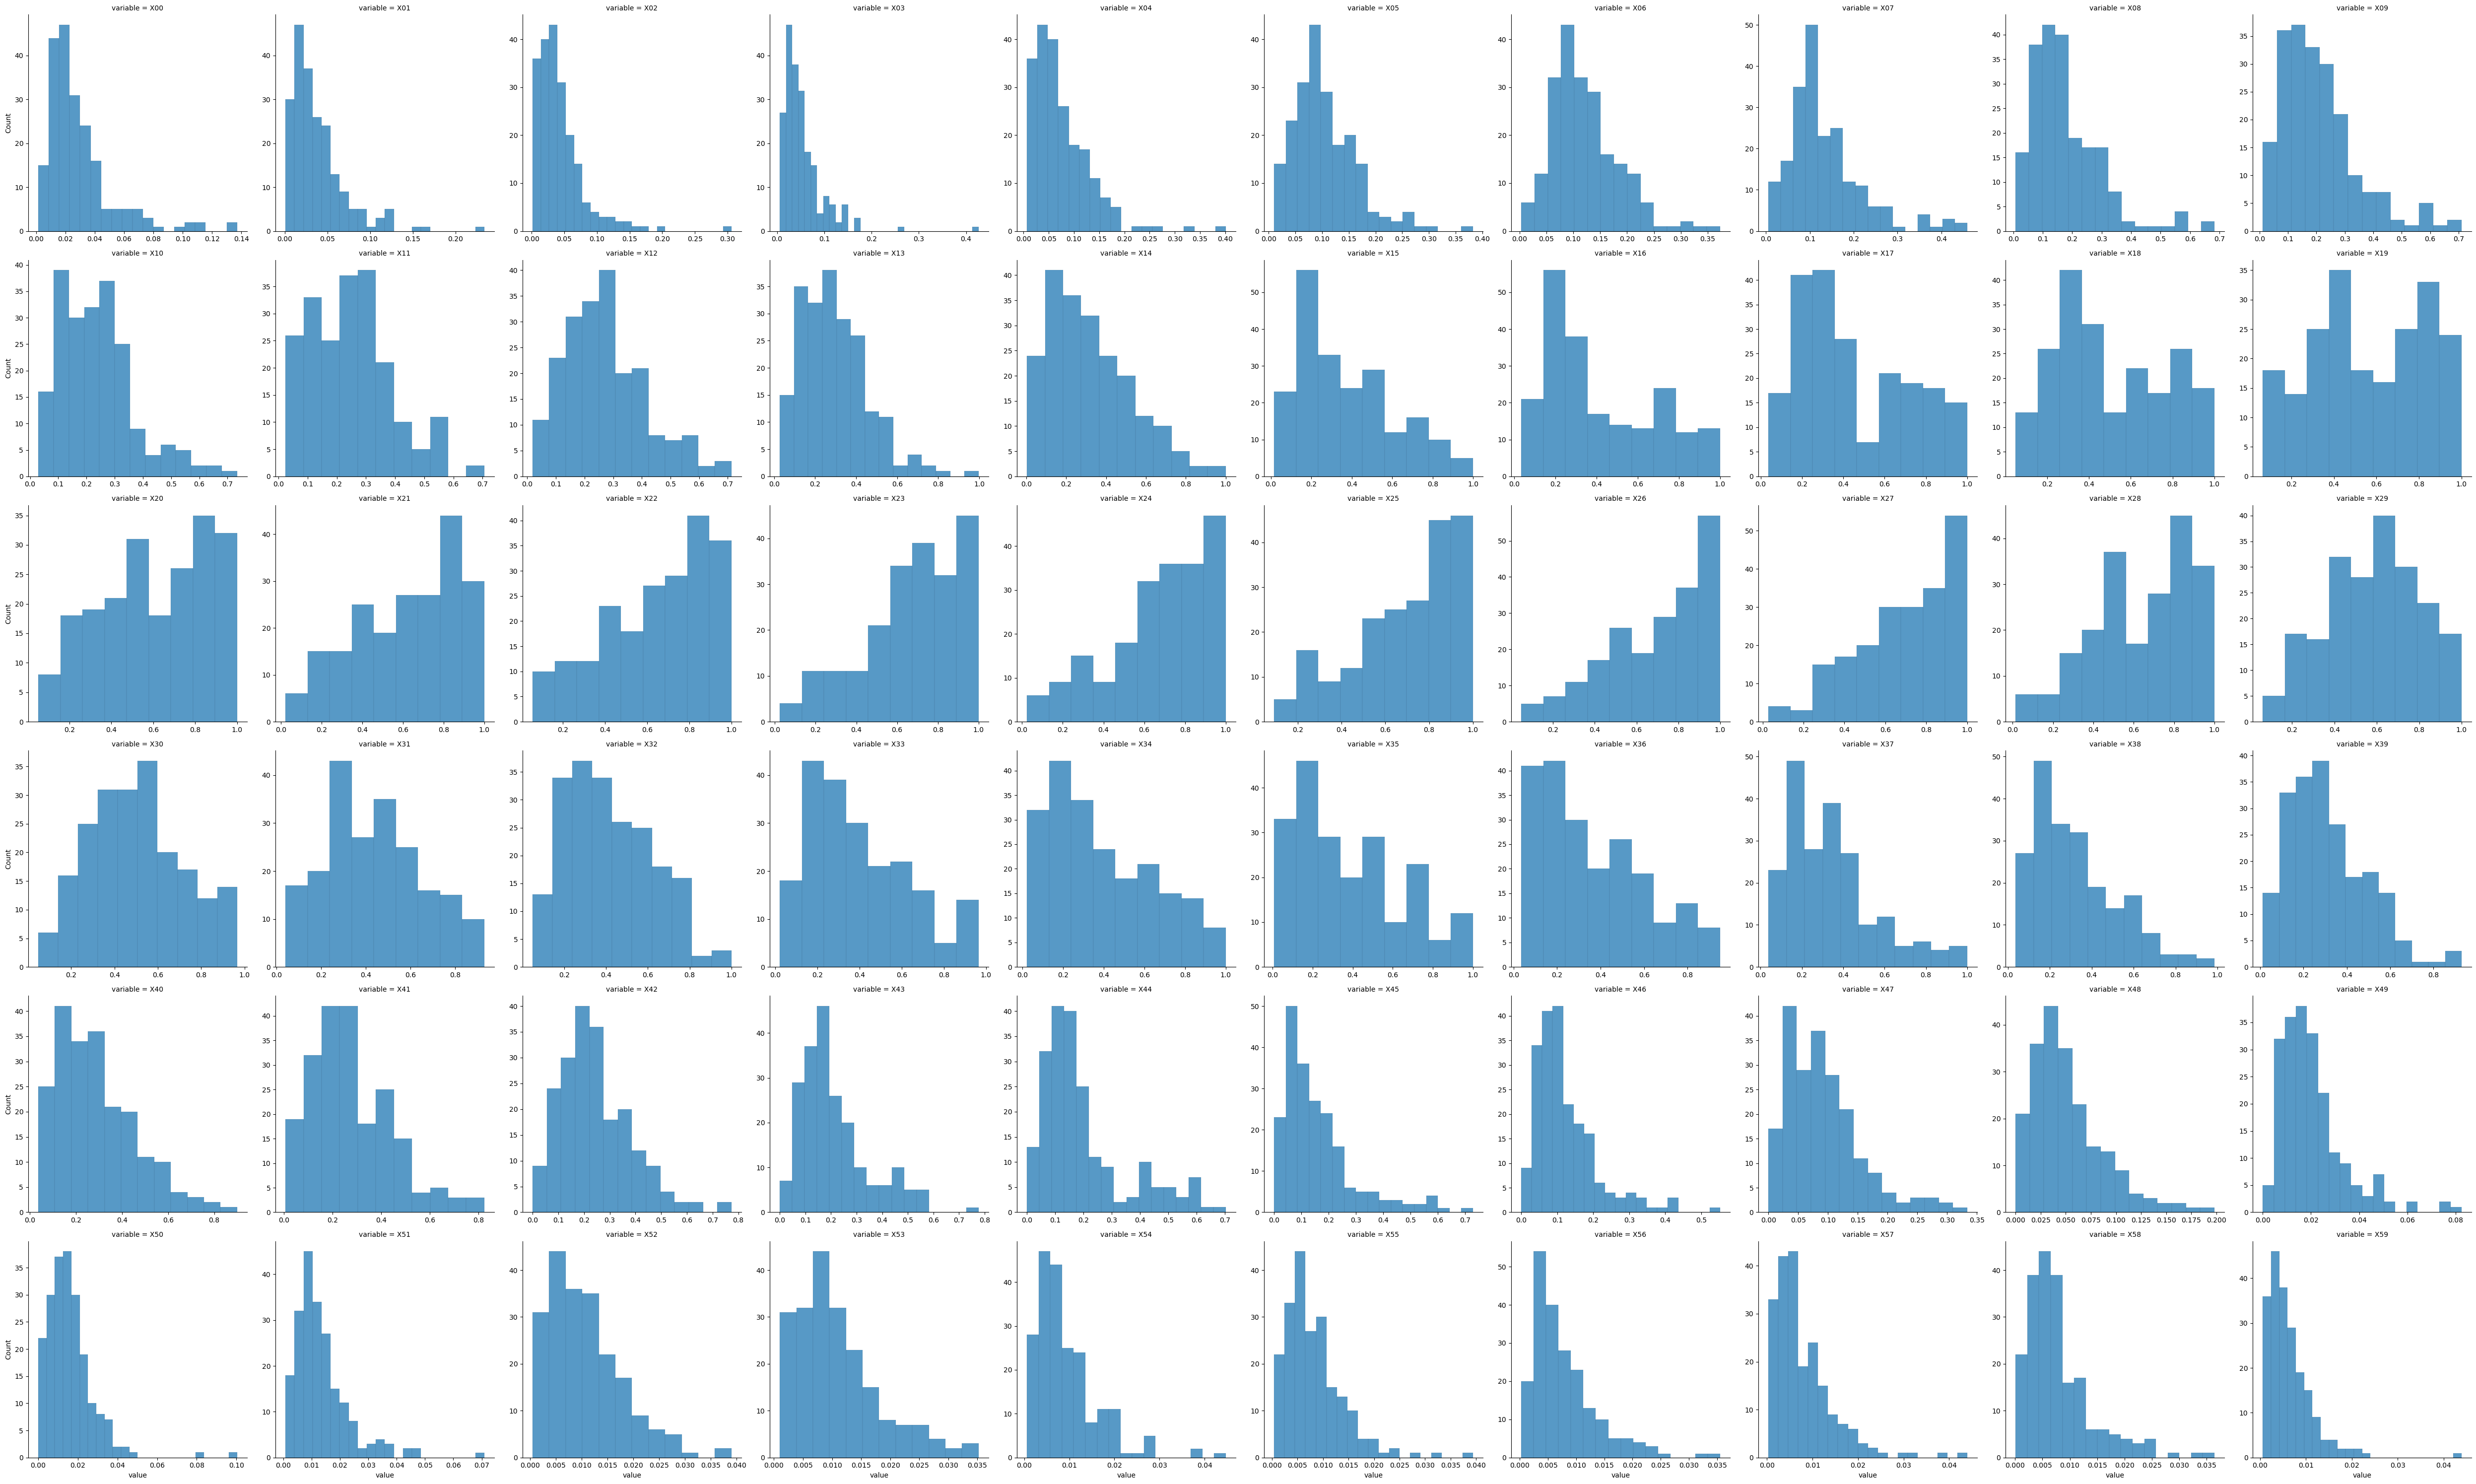

In [52]:
sns.displot(data = sonar_lf, x='value', col='variable', col_wrap=10, 
            kind='hist', 
            facet_kws={'sharey': False, 'sharex': False},
            common_bins=False)

plt.show()

We can also create the CONDITIONAL KDE!! Where we COLOR by the OBJECT COLUMN!

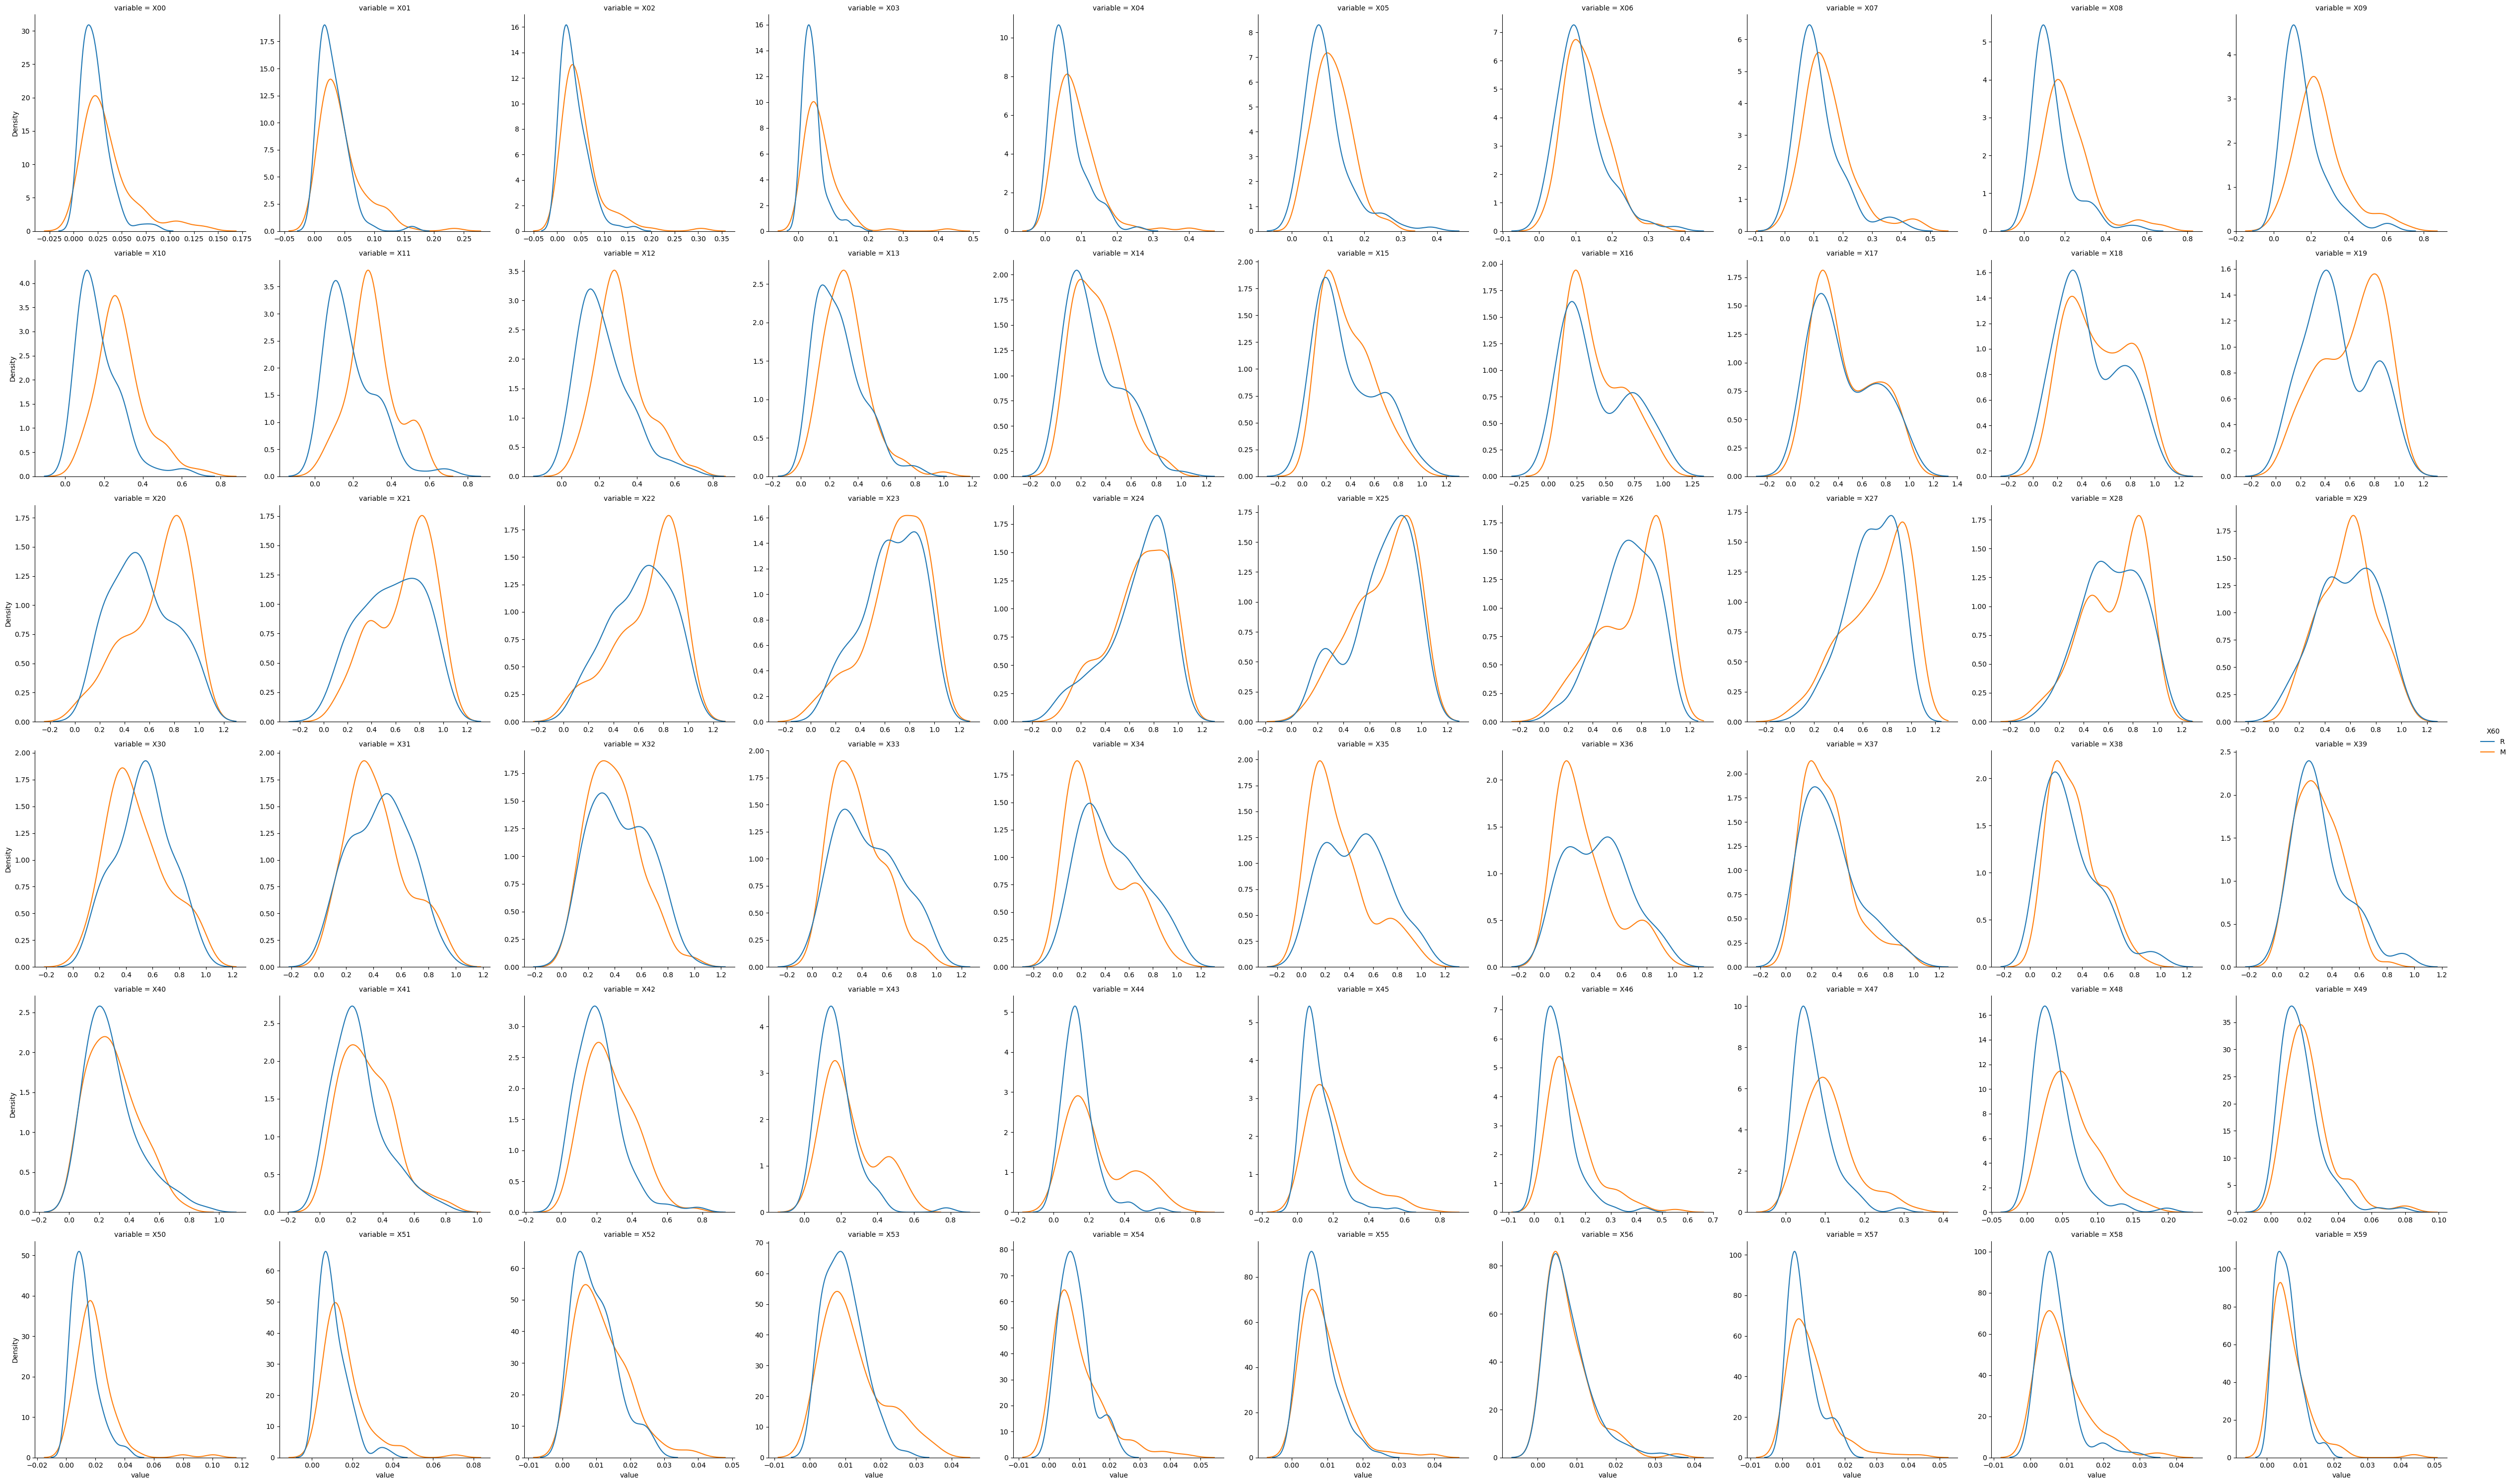

In [53]:
sns.displot(data = sonar_lf, x='value', col='variable', col_wrap=10, kind='kde',
            hue='X60', common_norm=False,
            facet_kws={'sharey': False, 'sharex': False})

plt.show()

We can also use VIOLINS to directly compare the conditional distributional SHAPES.

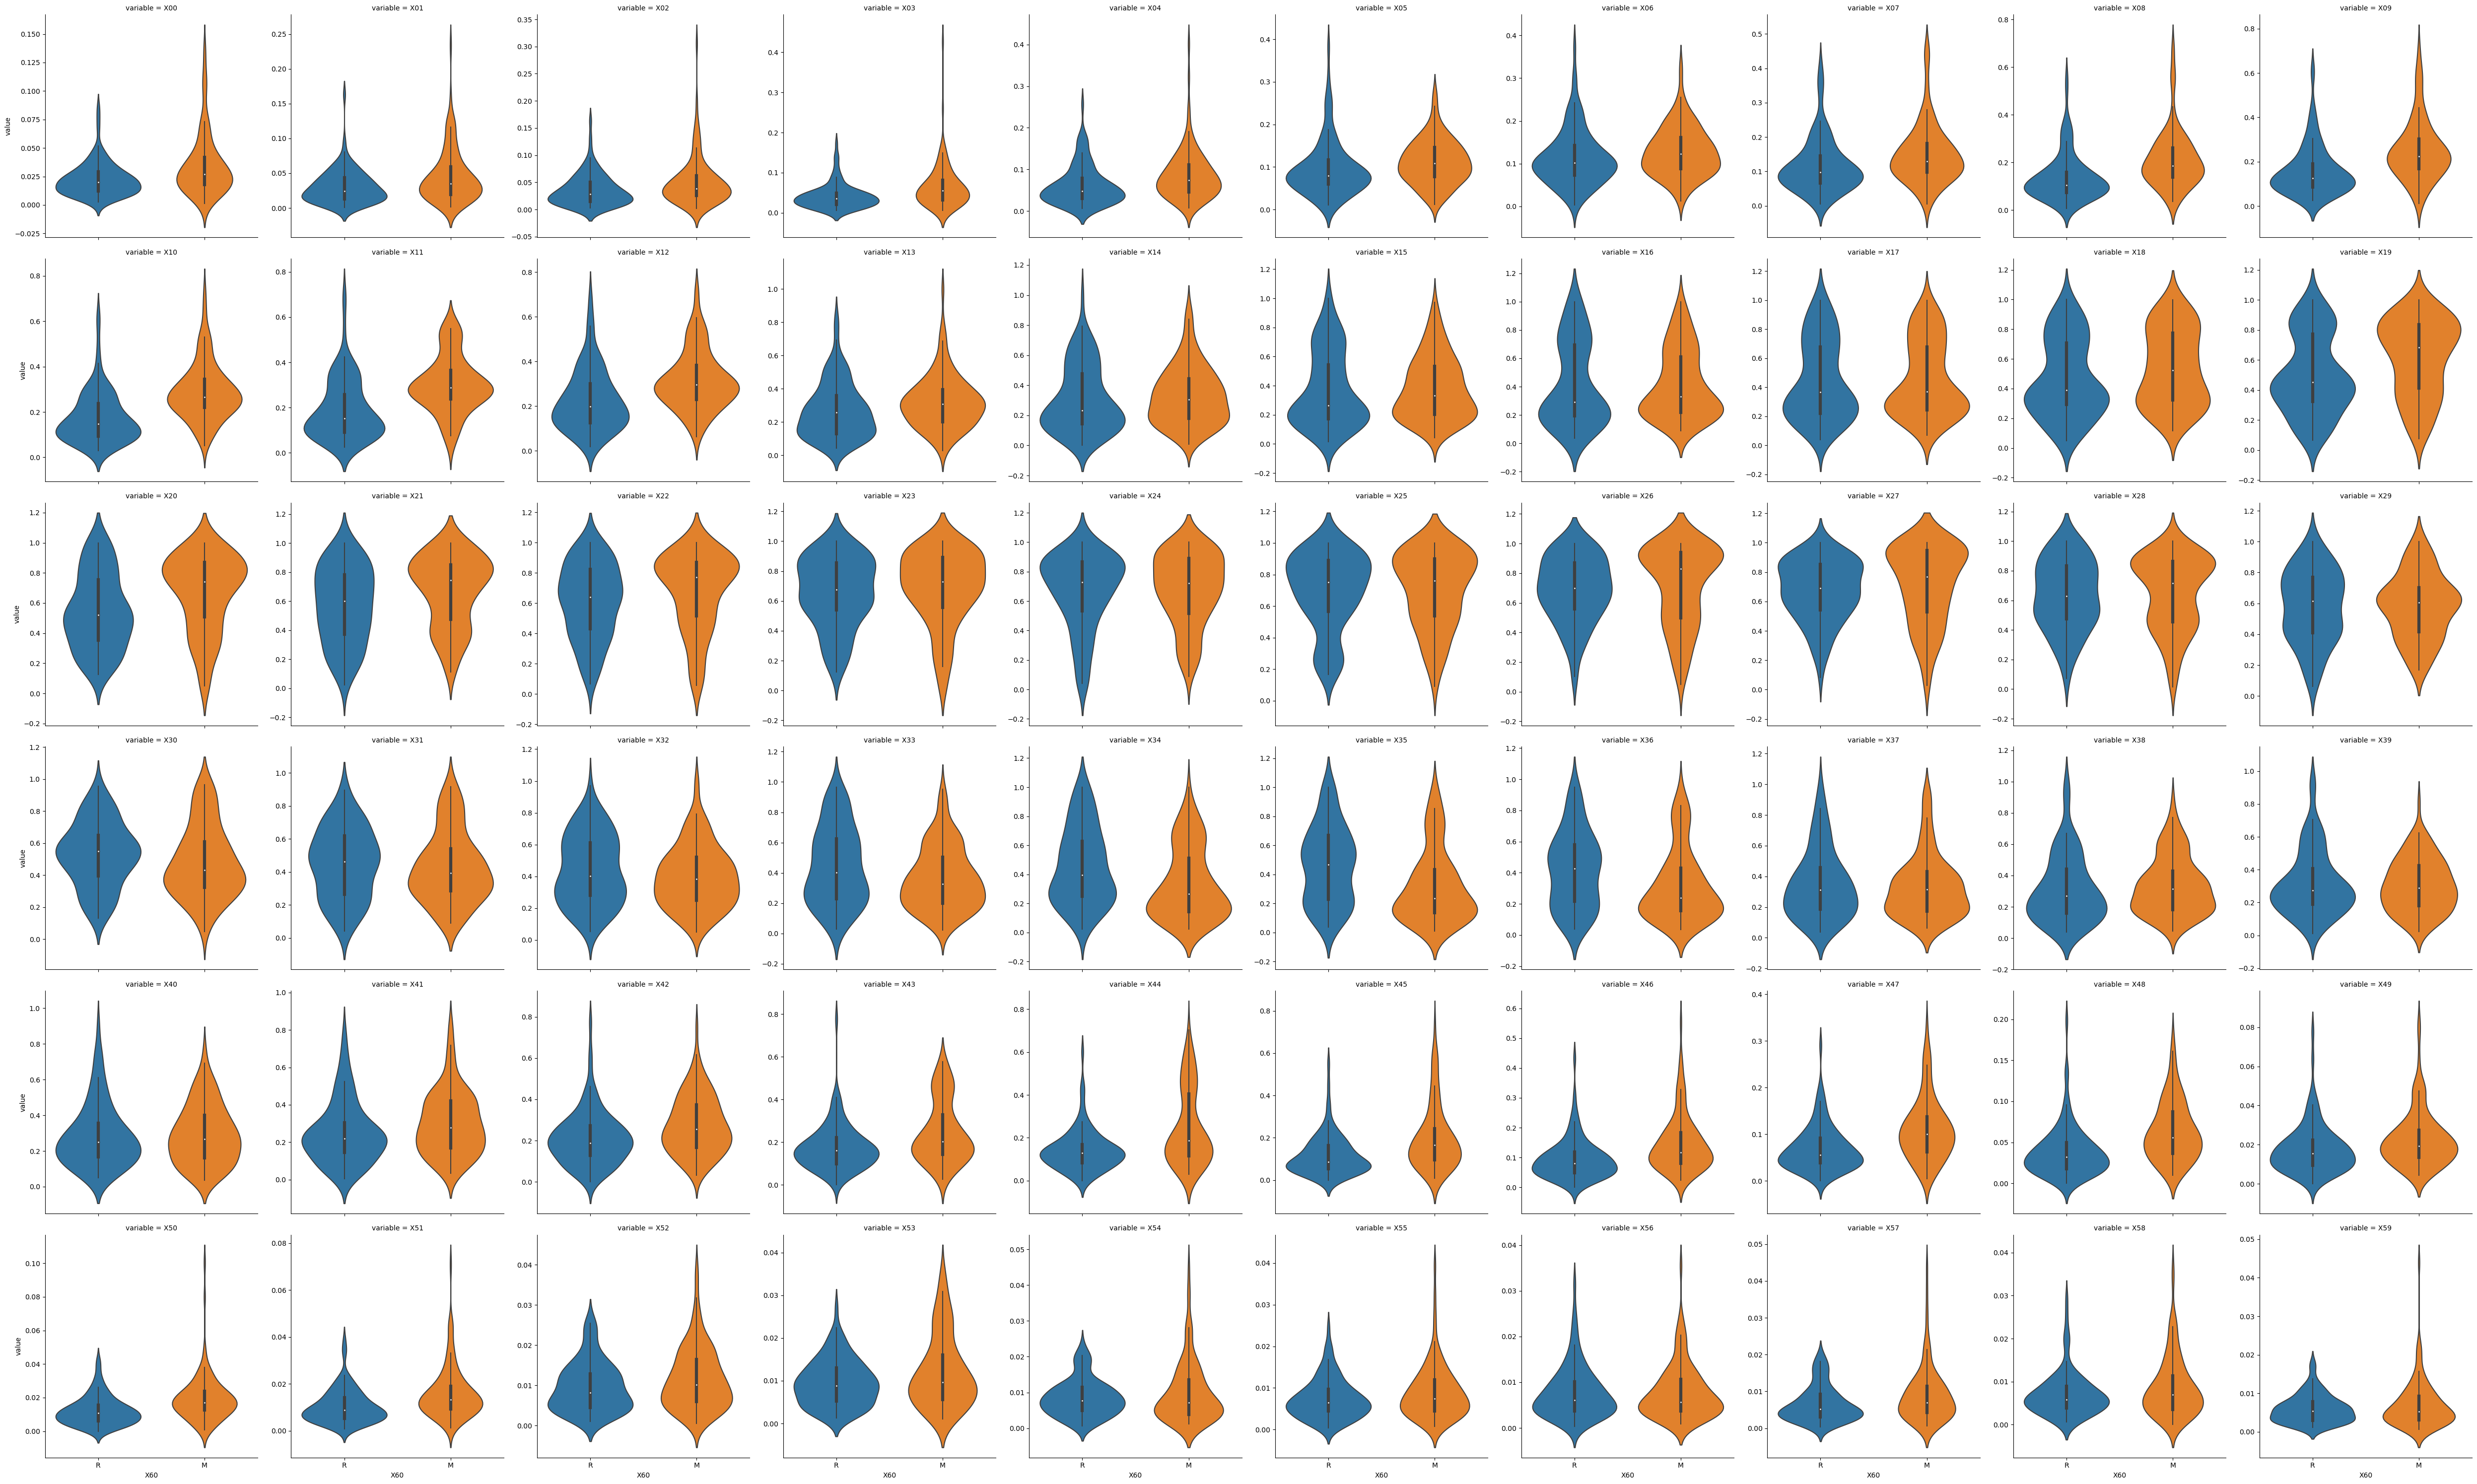

In [54]:
sns.catplot(data = sonar_lf, x='X60', y='value', col='variable', col_wrap=10,
            kind='violin',
            sharey=False)

plt.show()

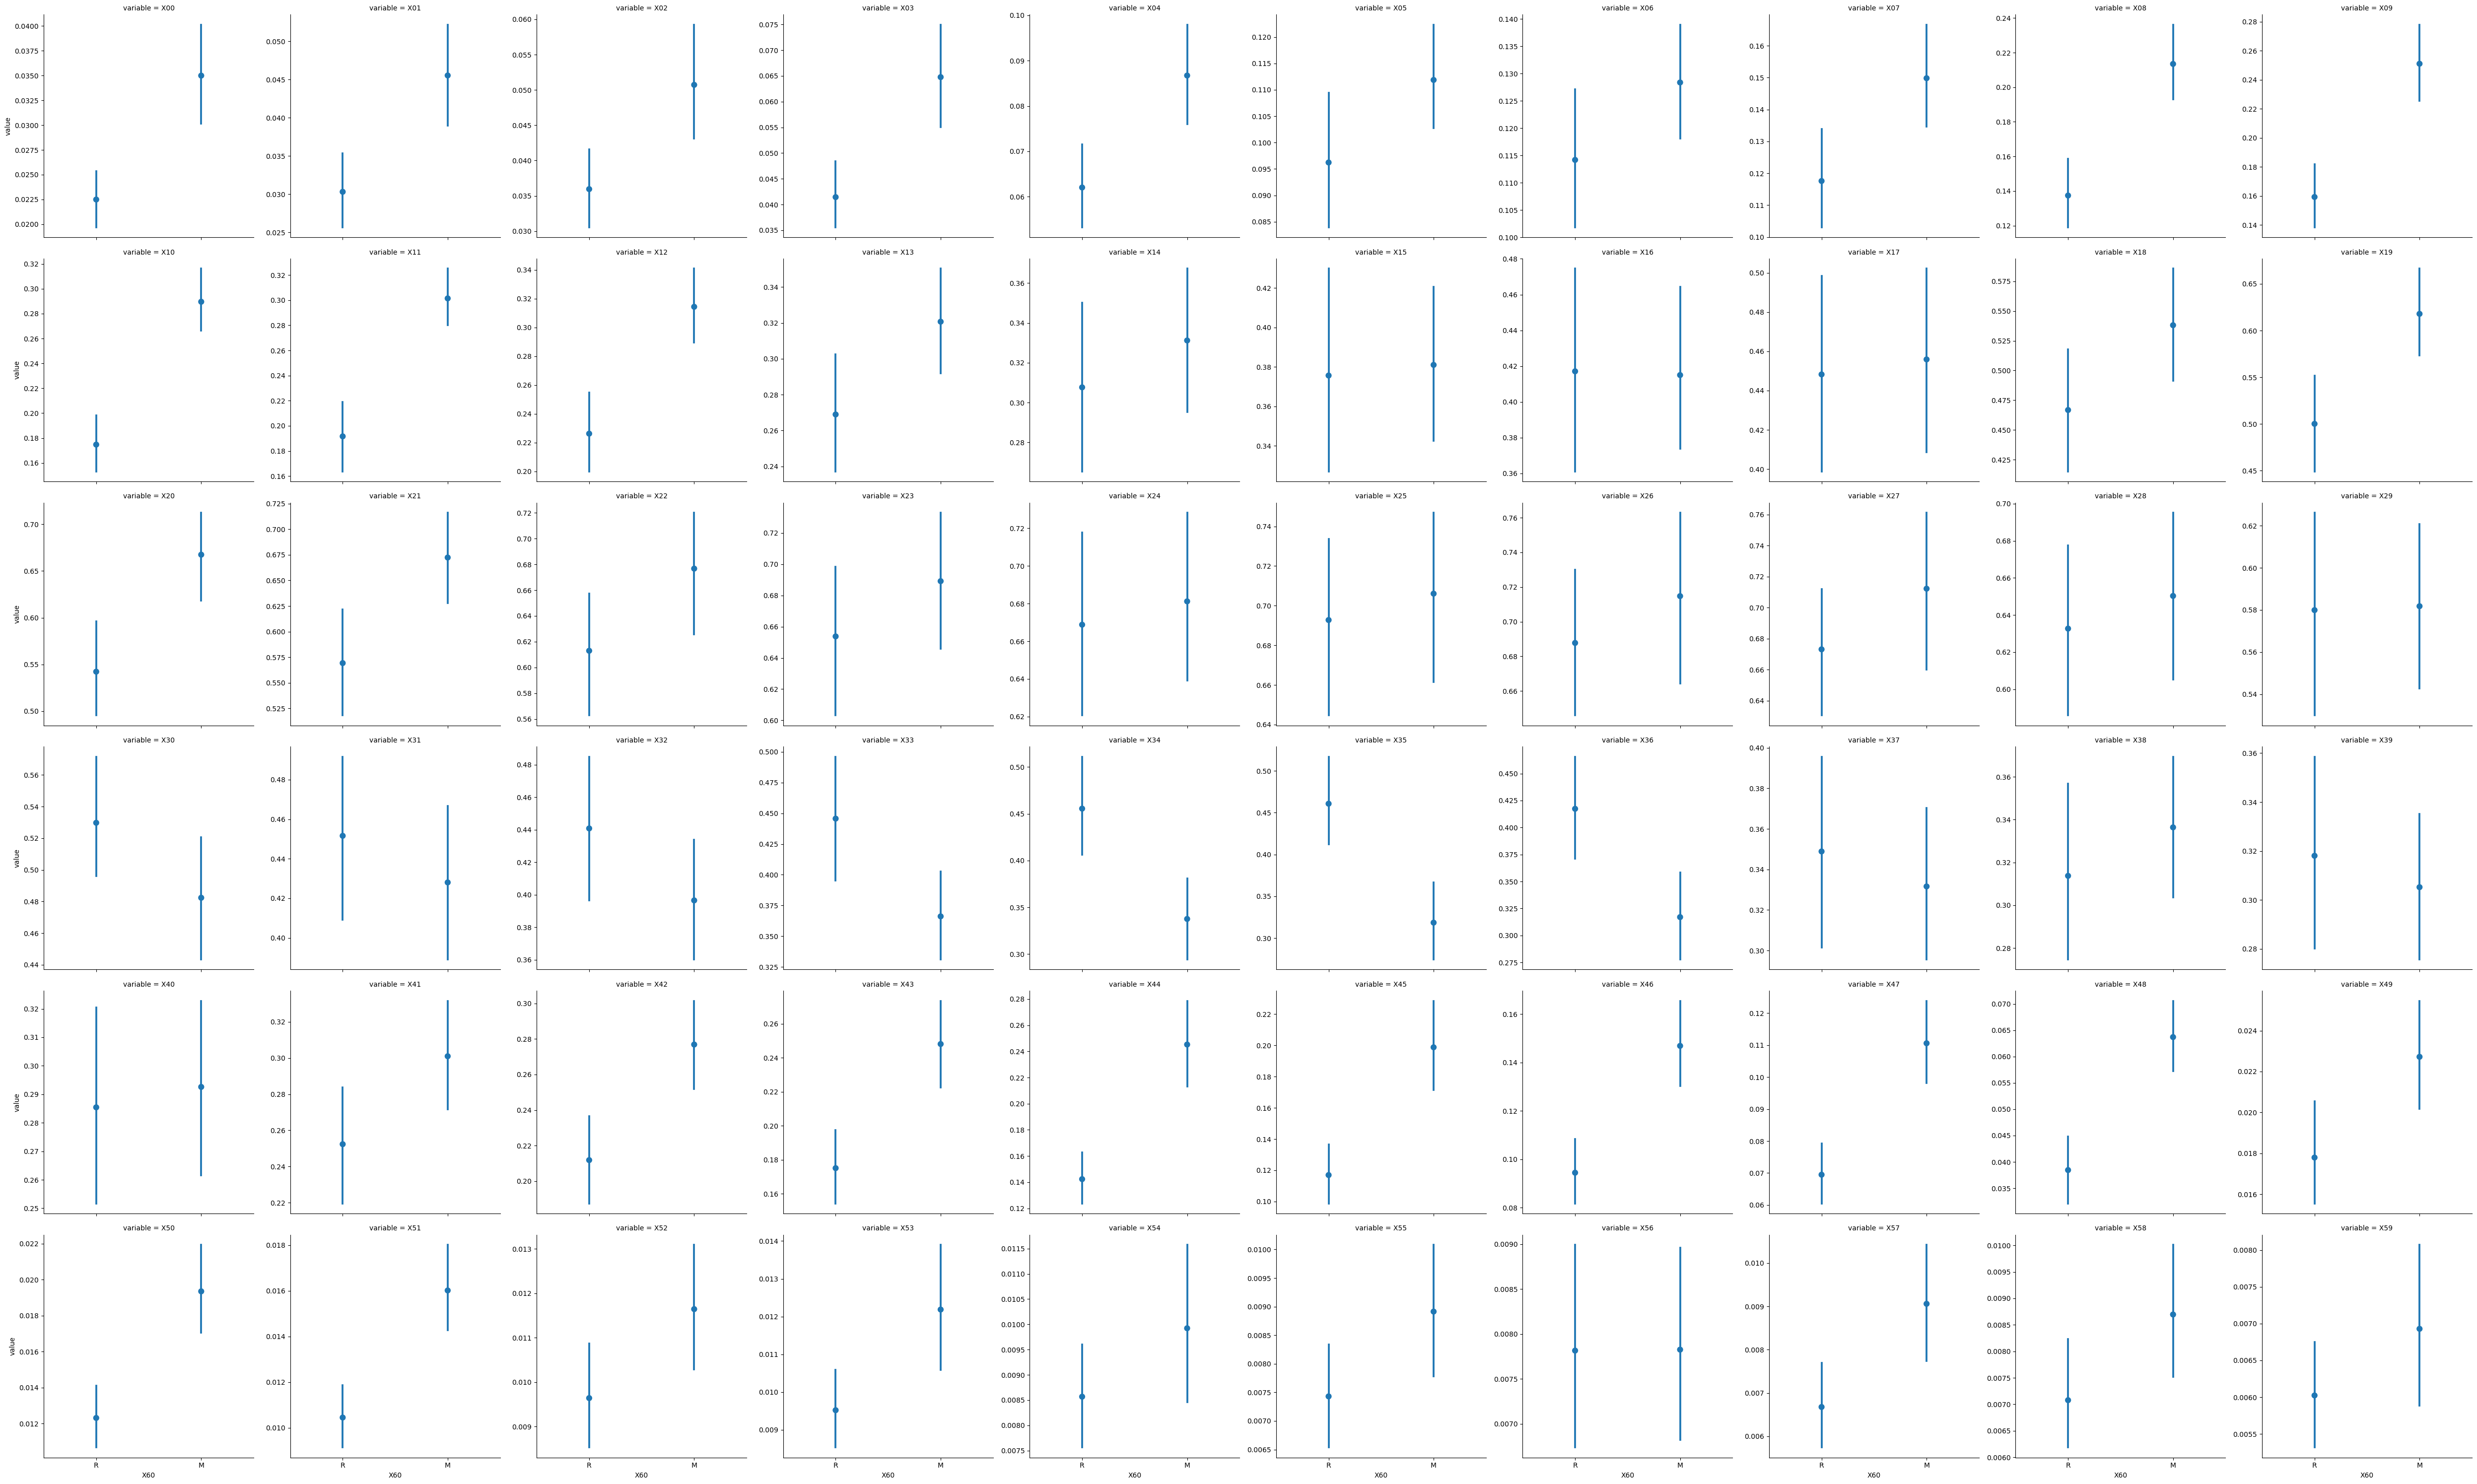

In [55]:
sns.catplot(data = sonar_lf, x='X60', y='value', col='variable', col_wrap=10,
            kind='point', join=False,
            sharey=False)

plt.show()

BUT...there is something unique about this data set...to see it let's use WIDE FORMAT Seaborn plotting...

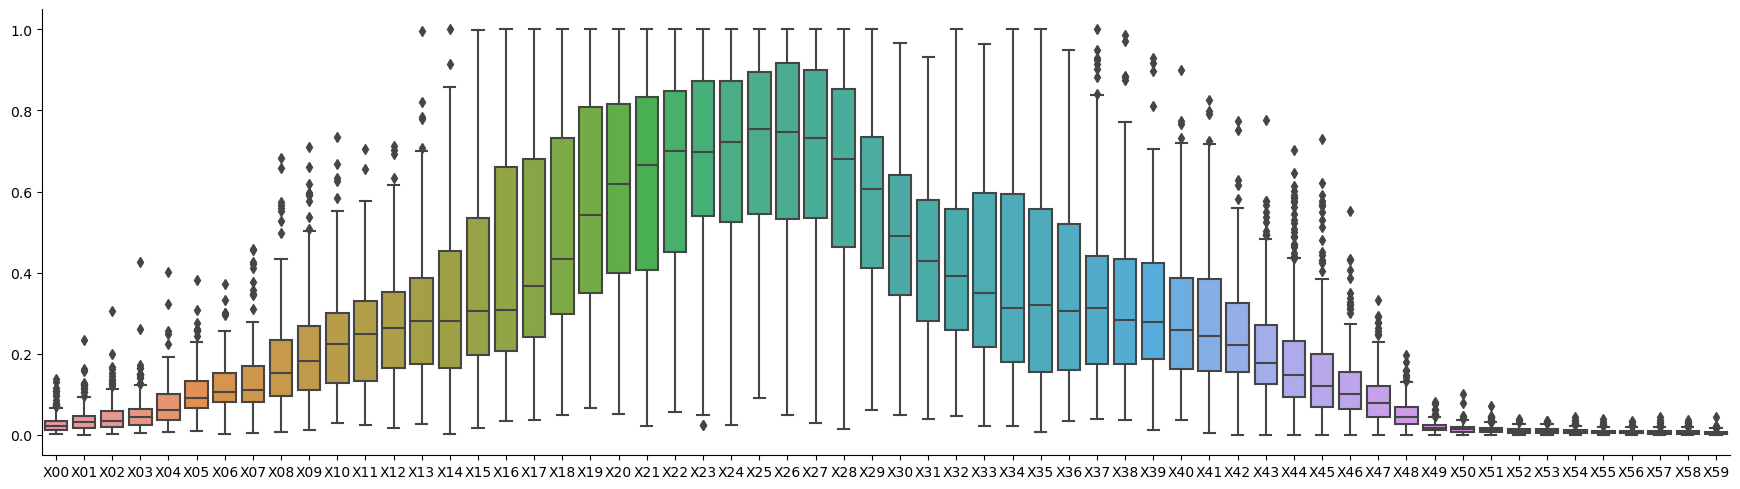

In [56]:
sns.catplot(data = sonar_df, kind='box', aspect=3.5)

plt.show()

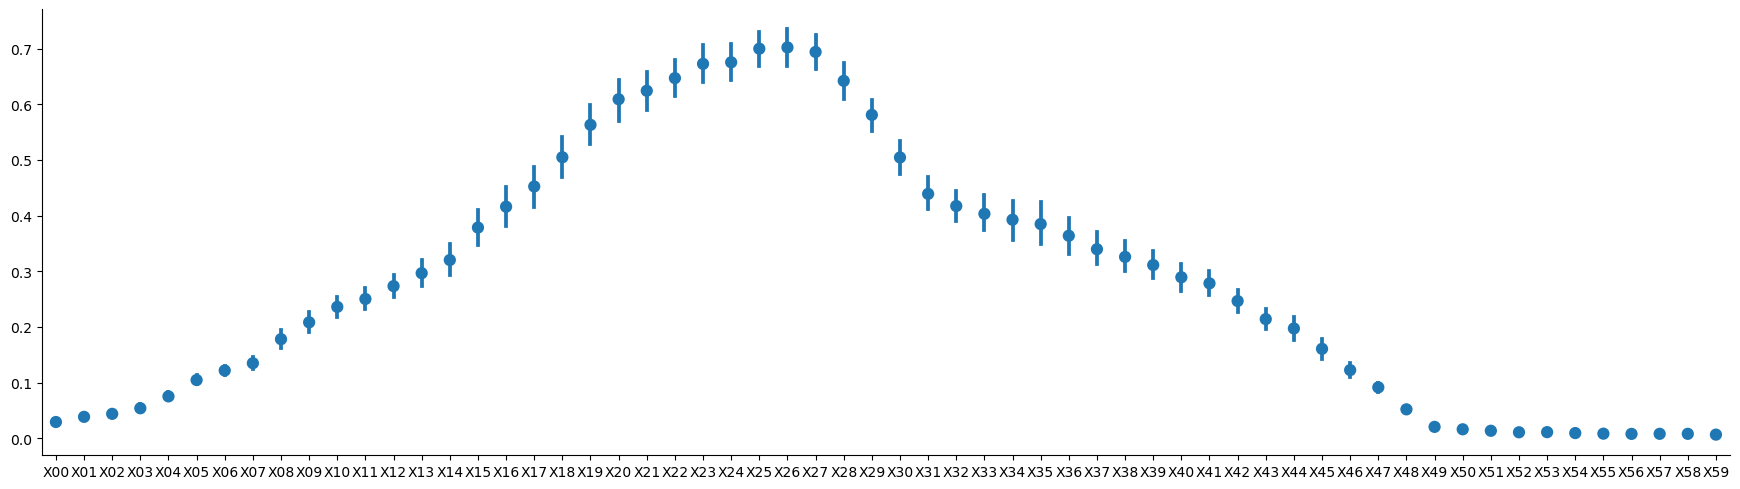

In [57]:
sns.catplot(data = sonar_df, kind='point', join=False, aspect=3.5)

plt.show()

The WIDE FORMAT does **NOT** let us easily GROUP BY categoricals!!!

The LONG FORMAT allows us to easily GROUP BY categoricals and associate FIGURE elements with the numerics!

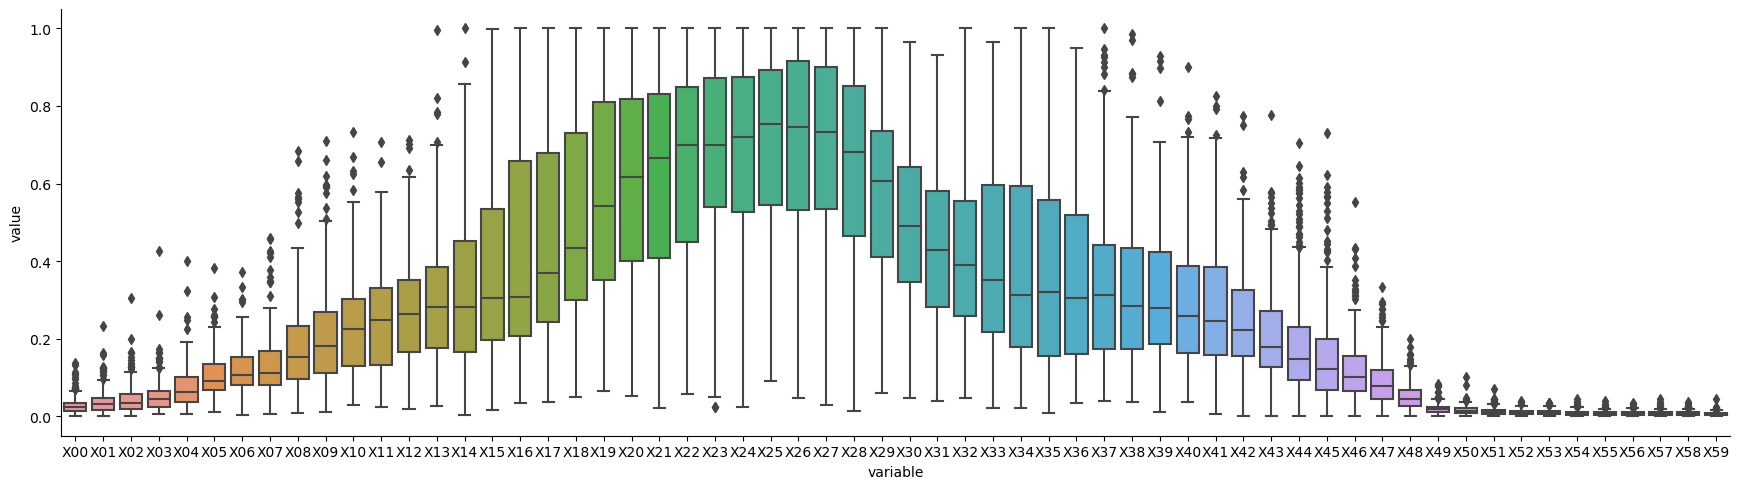

In [58]:
sns.catplot(data = sonar_lf, x='variable', y='value', kind='box', aspect=3.5)

plt.show()

GROUP BY `X60`!

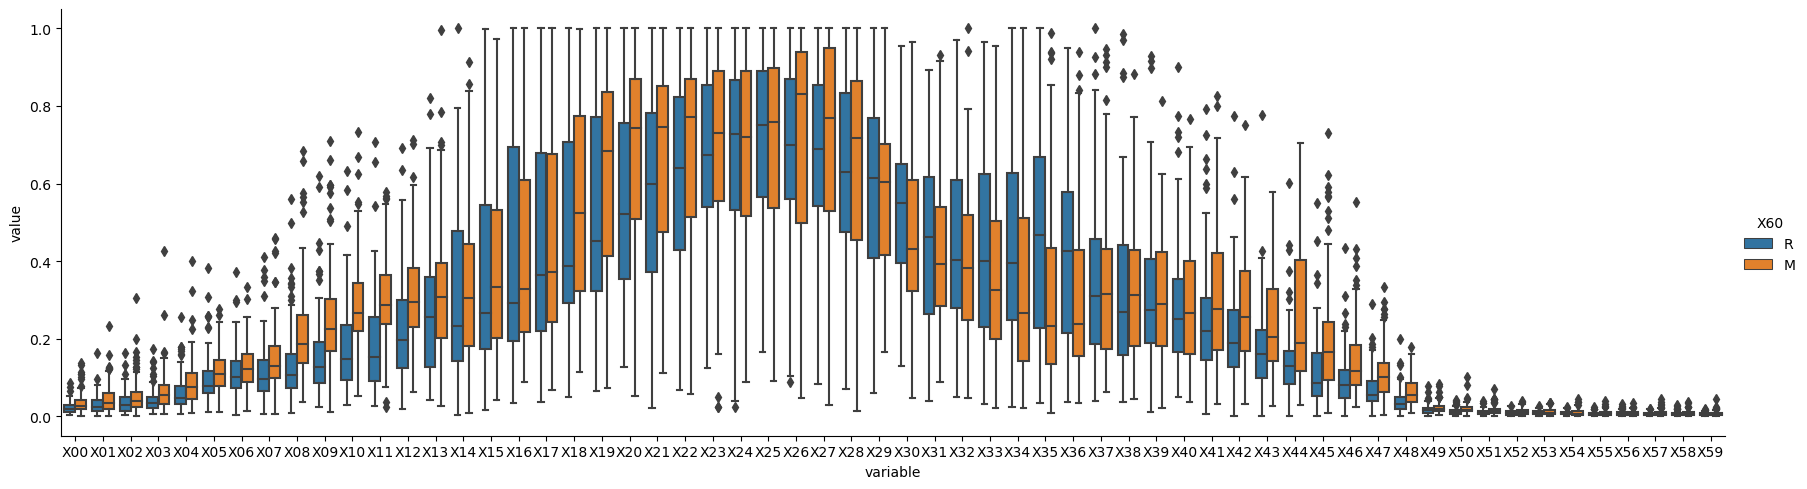

In [59]:
sns.catplot(data = sonar_lf, x='variable', y='value', hue='X60', kind='box', aspect=3.5)

plt.show()

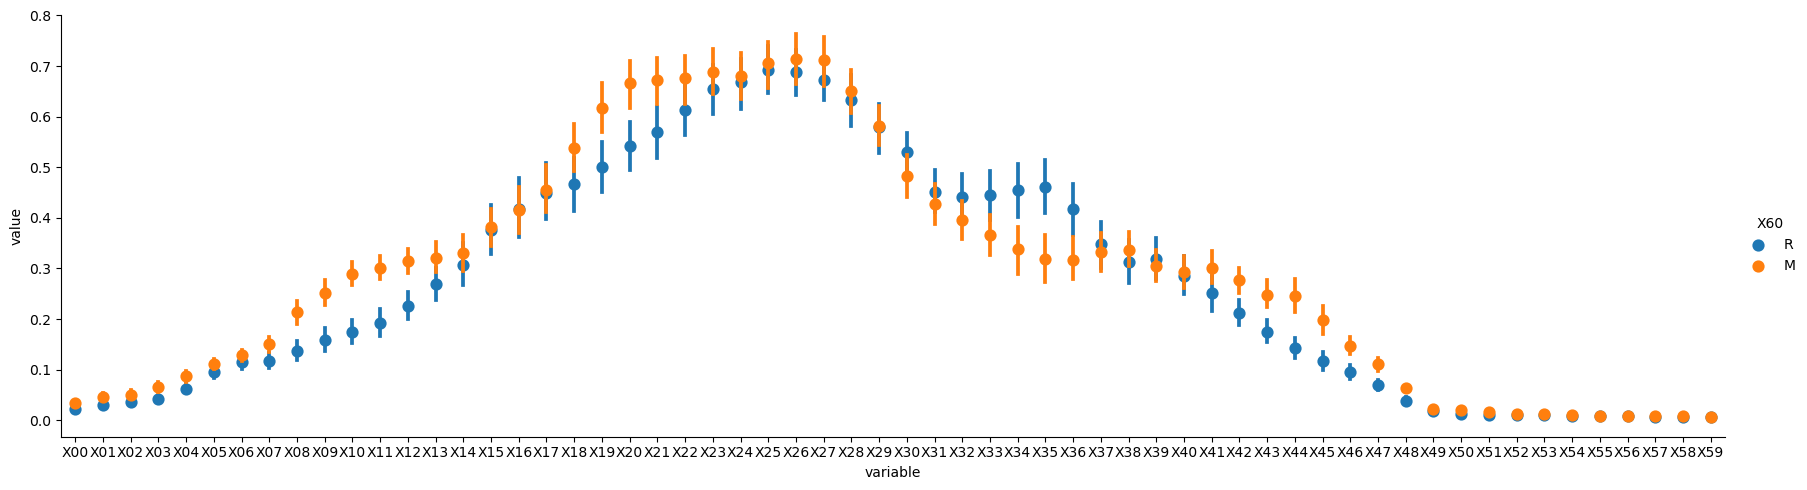

In [60]:
sns.catplot(data = sonar_lf, x='variable', y='value', hue='X60', kind='point', join=False, aspect=3.5)

plt.show()